# Google Play Store App Analysis

# I chose this data set because I have always had an Android phone my whole life and I wanted to see how Google Apps are performing on the Google Play Store. I wanted to analyze how many installs they have, what app categories are most popular, which apps and app categories bring in the most revenue, and if there is a statistically significent difference between paid and free apps. These insights can be helpful to potential developers to understand and capture the Android market!   


## **Data: The data was taken from the kaggle website. It is scraped from the Google Play Store containing application information such as reviews, installs, and genres, etc. 

## ** Data link: (https://www.kaggle.com/lava18/google-play-store-apps)

##App Attributes 
* App - Google Application name
* Category - General App category
* Rating - Overall user rating of the App
* Reviews - Number of user reviews the app has
* Size - Size of App
* Installs- Number of downloads/installs the app has
* Type- Free or Paid App Type
* Price - Cost to install App
* Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult  (Rating of suitability of App)
* Genres - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres. More granular breakdown of App category. 
* Last updated - Last date App was updated
* Current Ver - Current version of App
* Android Ver - Version Android devices can run app



# Hypothesis
# * 1)Paid apps are rated higher than free apps. 
# * 2) Family type apps have higher ratings than gaming type apps.
###          * 2a) Gaming apps have the highest ratings. 
# * 3) There is a strong correlation between app ratings and number of installs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy
%matplotlib inline

In [3]:
df=pd.read_csv("googleplaystore.csv")

# What App categories have the highest revenue?
# Are more recently updated apps more likely to gain revenue?

## Data Cleaning
* Remove dollar sign from price column and change to numeric value
* Create new column to find paid only apps.
* Remove symbols from Installs column and change to numeric value

In [5]:
##convert price to numeric, will have to first replace the $ sign and then convert to numeric
import warnings
warnings.filterwarnings('ignore')
df['Price_num'] = df['Price'].str.replace('$', '')## replace $ signs with blanks,'.str' stringifies the object field.

df['Price_num']=df['Price_num'].convert_objects(convert_numeric=True)## this step can now convert strings into dollars.

df.loc[df ['Price_num']>0, 'Paid_App_Price']=df['Price_num']##only populate this column if price>0, so that we can take averages
#we're creating a new field called Paid_App_Price which will have the price_num value when price num>0


df['Installs_num'] = df['Installs'].str.replace('+', '')##remove the +
df['Installs_num'] = df['Installs_num'].str.replace(',', '')##remove the comma
df['Installs_num']=df['Installs_num'].convert_objects(convert_numeric=True)

In [6]:
## get the total amount spent
df['Total_Revenue']=df['Price_num']*df['Installs_num']

In [7]:
df[df['Price_num']==0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_num,Paid_App_Price,Installs_num,Total_Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,NaN,10000.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,NaN,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,NaN,5000000.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,NaN,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,NaN,100000.0,0.0


In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price_num         float64
Paid_App_Price    float64
Installs_num      float64
Total_Revenue     float64
dtype: object

In [9]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')## converts last_updated to a datetime value

In [10]:
# Finding max date
maximum = max(df['Last Updated'])## how many days since the update, so first need to get the max date field.

# Adding one more day to the max date, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
df['Recency'] = maximum - df['Last Updated']
df.head()
df['Recency']=df['Recency'].dt.days## this converts to raw date, divide by 30.5 to get months.


In [11]:
df['Recency_Months']=df['Recency']/30.5##getting months

In [12]:
df['Recency_Months']=df['Recency_Months'].round()## round months

In [13]:
df['Reviews']=df['Reviews'].convert_objects(convert_numeric=True)

In [14]:
df[['Rating', 'Reviews', 'Size', 'Type','Price_num']].head()

,Rating,Reviews,Size,Type,Price_num
0,4.1,159.0,19M,Free,0.0
1,3.9,967.0,14M,Free,0.0
2,4.7,87510.0,8.7M,Free,0.0
3,4.5,215644.0,25M,Free,0.0
4,4.3,967.0,2.8M,Free,0.0


In [15]:
import warnings
warnings.filterwarnings("ignore")


df["Size_num"] = df['Size'].str.replace('M'or "Kb", '')
df["Size_num2"] = df ["Size_num"].str.replace("Varies with device","")
df["Size_num2"]= df["Size_num"].convert_objects(convert_numeric=True)
df.loc[df["Size_num2"]>0, "Size_true"]= df["Size_num2"]
df["Size_true"]= df["Size_num2"].convert_objects(convert_numeric=True)

In [16]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

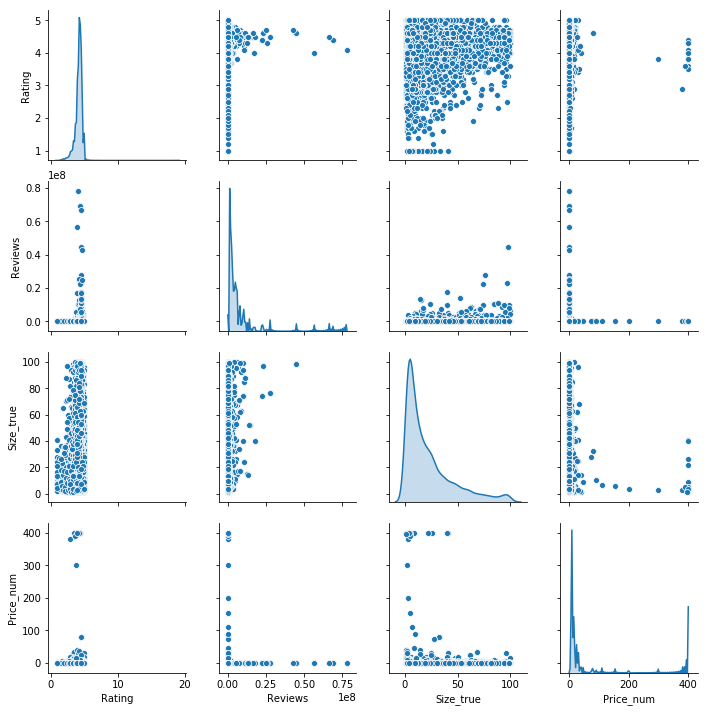

In [17]:
sns.pairplot(df[['Rating', 'Reviews', 'Size_true','Price_num','Type']],diag_kind = 'kde',palette="viridis")

In [18]:
df=df[df['Category']!='1.9']
df['Category_propercase']=df['Category'].str.title()

df['Apps']=1
pv=df.pivot_table(index='Category_propercase', values=['Apps'] , aggfunc='sum')

pv=pv.sort_values('Apps')

In [19]:
pv.shape

(33, 1)

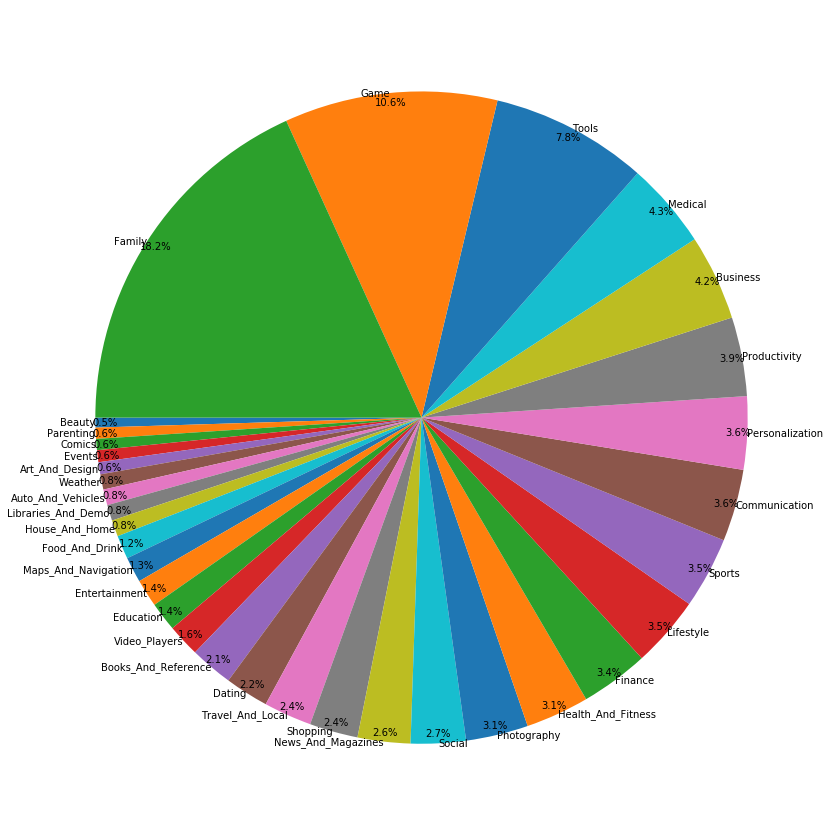

In [20]:
plt.figure(figsize=(15, 15))
import numpy as np
counts = pv['Apps']
categories = pv.index


plt.pie(counts,
        ##colors=np.random.rand(12,1),
        labels=['{}'.format(x) for x in categories],
        startangle=180,
       
        pctdistance=0.97, labeldistance=1.0,
        autopct='%1.1f%%') ###this format applies percents.
#plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))

plt.show()


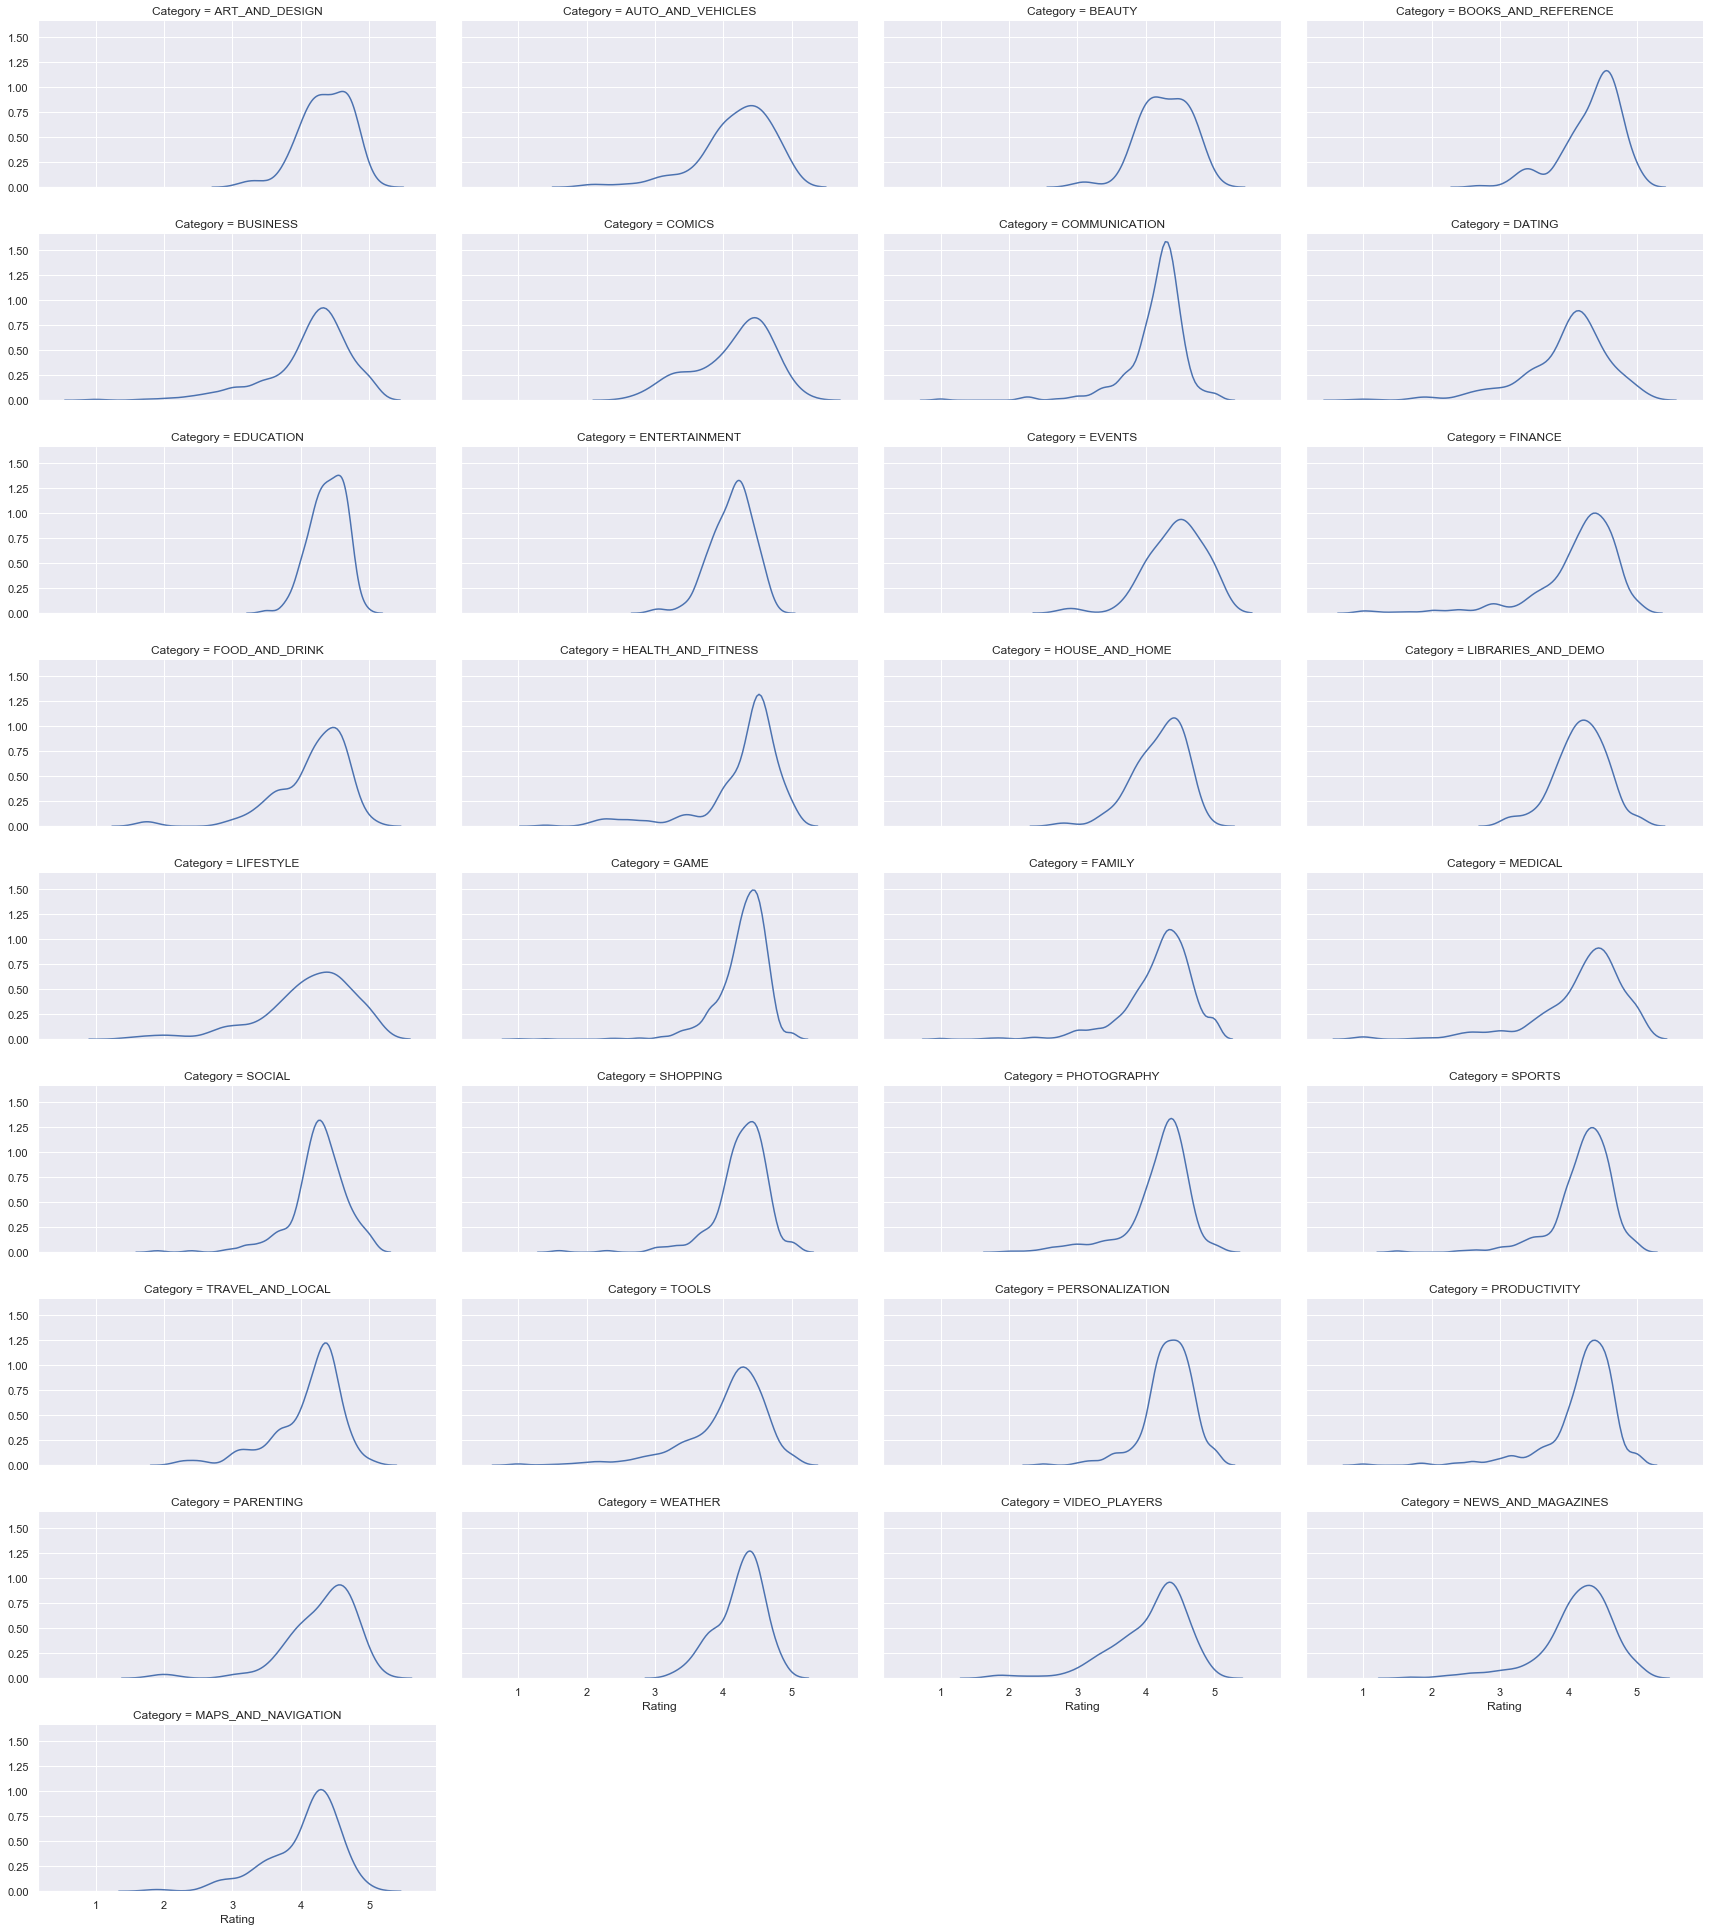

In [21]:
df_r=df[df['Rating']<=5]
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(8,8)})
g = sns.FacetGrid(df_r[['Category','Rating']], col="Category",aspect=2,col_wrap=4) 
g.map(sns.kdeplot, "Rating")


## Books and Reference seem to have the most skewed ratings in favor of positive ratings

In [22]:
df['Recency_Months_quartiles']=pd.qcut(df['Recency_Months'],4) ##get 4 different quartilecuts for recency months if you want to create bar charts

In [23]:

k = df.groupby(["Recency_Months_quartiles"]).agg({'Reviews':'sum'}) 
k.columns=['Num_Reviews']
k=k.sort_values('Num_Reviews',ascending=False)
k

,Num_Reviews
Recency_Months_quartiles,
"(-0.001, 1.0]",4.250355e+09
"(1.0, 3.0]",3.085195e+08
"(3.0, 11.0]",1.778524e+08
"(11.0, 98.0]",7.789044e+07


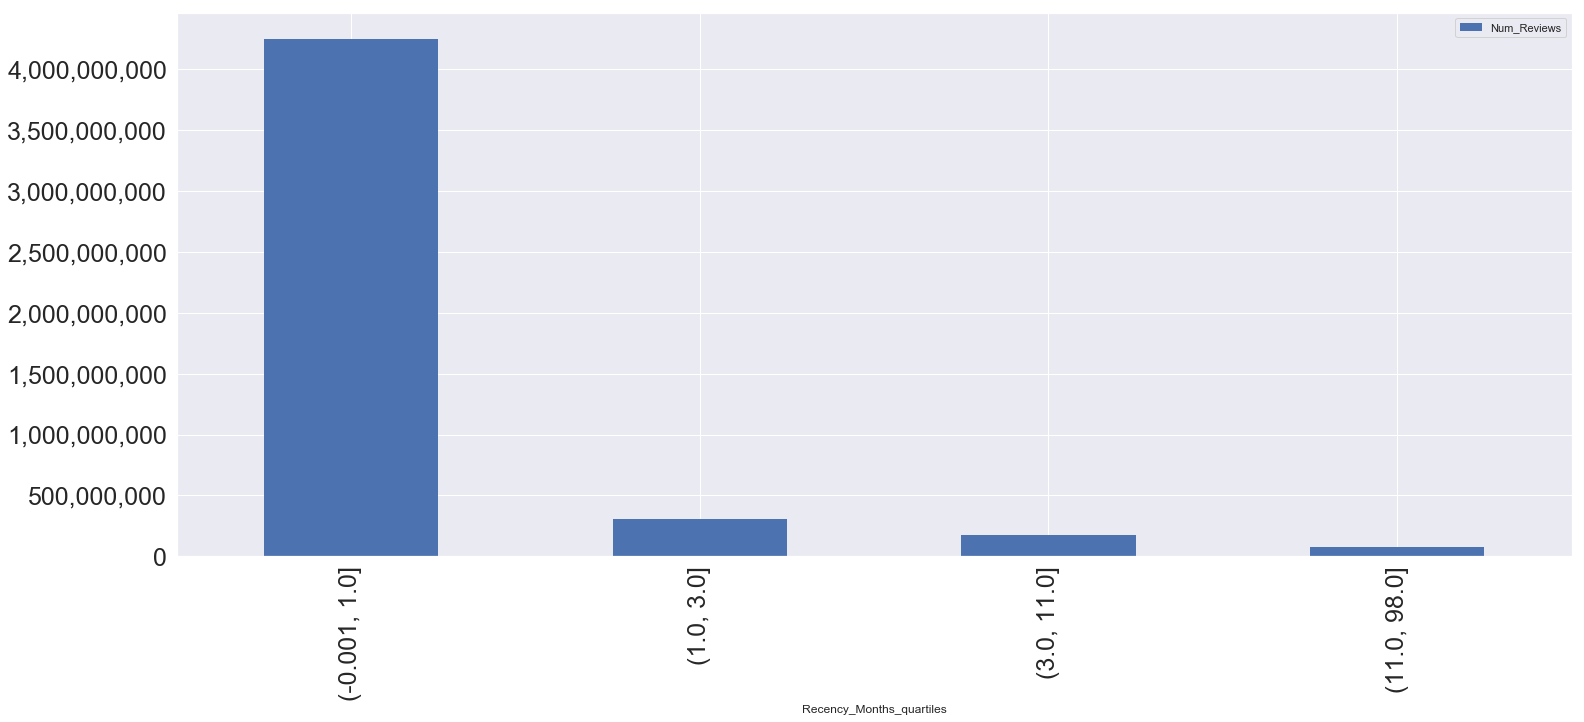

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Num_Reviews']>0].plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=25)
fmt = '{x:,.0f}'##to get the y axis in comma puntuated values -- for example not 40000000, but 400,000,000.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

## More recently updated apps have more reviews, if apps have not been updated, they probably went of out business or are not doing well.
## Apps that haven't been updated probably didn't catch on, so the creators probably stopped updating them.

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Installs_num,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,...,10000.0,0.0,214.0,7.0,19,19.0,19.0,Art_And_Design,1,"(3.0, 11.0]"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,500000.0,0.0,206.0,7.0,14,14.0,14.0,Art_And_Design,1,"(3.0, 11.0]"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,5000000.0,0.0,8.0,0.0,8.7,8.7,8.7,Art_And_Design,1,"(-0.001, 1.0]"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,...,50000000.0,0.0,62.0,2.0,25,25.0,25.0,Art_And_Design,1,"(1.0, 3.0]"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,100000.0,0.0,50.0,2.0,2.8,2.8,2.8,Art_And_Design,1,"(1.0, 3.0]"


In [26]:
df['Price_num2']=df['Price_num']## create a copy, so that we can get both count and mean below.

k = df.groupby(["Category"]).agg({'Price_num':'max','Price_num2':'mean','Paid_App_Price':'mean'}) ##to stop overriding.
k.columns=['Max_Price','Avg_Price','Avg_Price_of_Paid_Apps']
k.head()

,Max_Price,Avg_Price,Avg_Price_of_Paid_Apps
Category,,,
ART_AND_DESIGN,1.99,0.091846,1.990000
AUTO_AND_VEHICLES,9.99,0.158471,4.490000
BEAUTY,0.00,0.000000,NaN
BOOKS_AND_REFERENCE,6.49,0.518485,4.277500
BUSINESS,89.99,0.402761,13.233571


In [27]:
k=k[k['Max_Price']>0]

# Which category has the highest avg price, highest avg price for paid apps?

In [28]:
k=k.sort_values('Max_Price',ascending=False)
k

# Which category has the highest avg price, highest avg price for paid apps?

,Max_Price,Avg_Price,Avg_Price_of_Paid_Apps
Category,,,
LIFESTYLE,400.00,6.180288,124.256316
FINANCE,399.99,7.925765,170.637059
FAMILY,399.99,1.234675,12.747539
MEDICAL,200.00,3.110065,13.210642
PRODUCTIVITY,154.99,0.591816,8.961786
EVENTS,109.99,1.718594,109.990000
BUSINESS,89.99,0.402761,13.233571
SPORTS,29.99,0.260417,4.166667
PHOTOGRAPHY,29.99,0.400627,6.100455


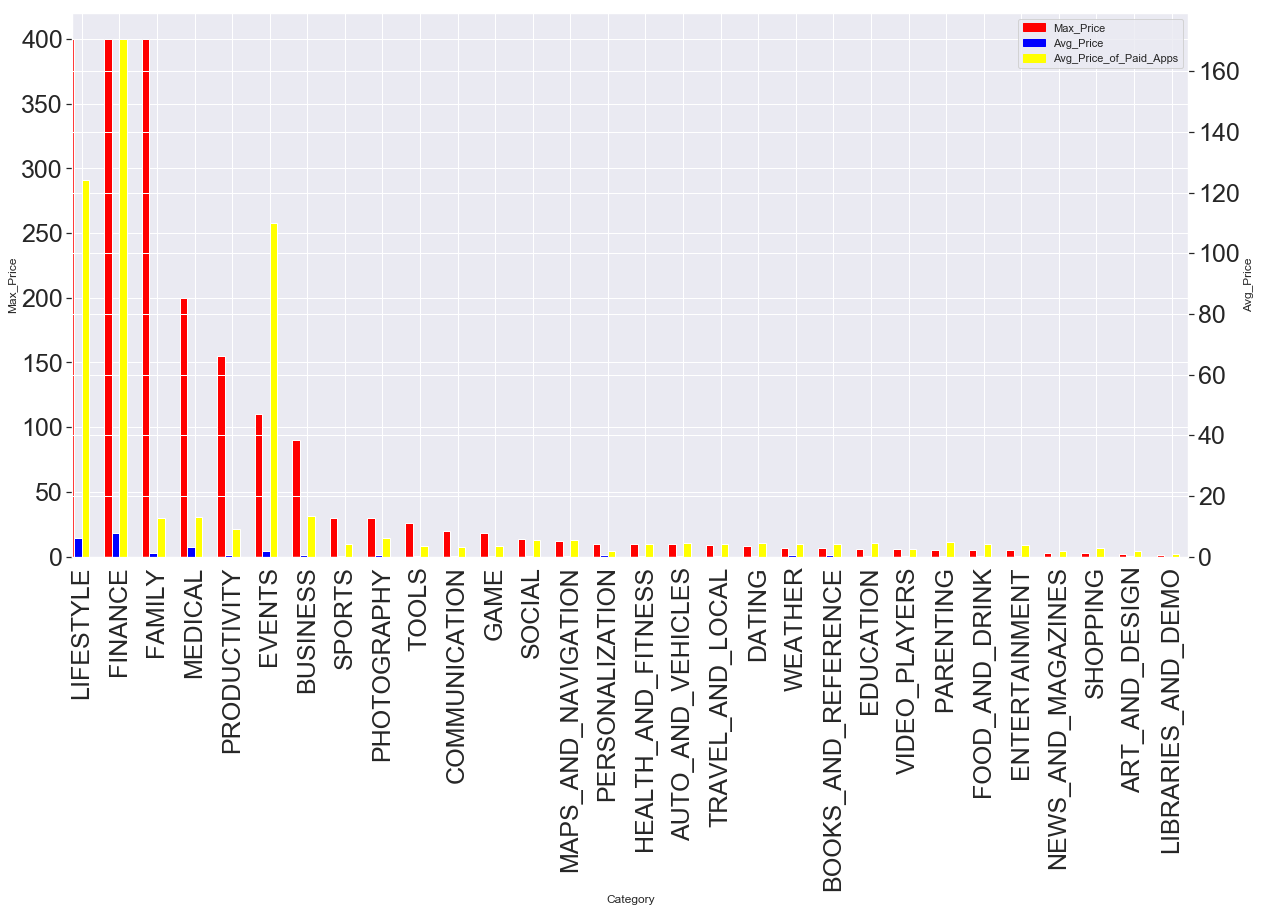

In [29]:
#Plot on dual axis
from pylab import rcParams
import matplotlib.patches as mpatches
rcParams['figure.figsize'] = 20, 10##this the sets the graph size
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

k['Max_Price'].plot(kind='bar', color='red', ax=ax, width=width, position=2,fontsize=25)
k['Avg_Price'].plot(kind='bar', color='blue', ax=ax2, width=width, position=1,fontsize=25)
k['Avg_Price_of_Paid_Apps'].plot(kind='bar', color='yellow', ax=ax2, width=width, position=0,fontsize=25)

ax.set_ylabel('Max_Price')
ax2.set_ylabel('Avg_Price_of_Paid_Apps')
ax2.set_ylabel('Avg_Price')

red_patch = mpatches.Patch(color='red', label='Max_Price')
blue_patch = mpatches.Patch(color='blue', label='Avg_Price')
yellow_patch = mpatches.Patch(color='Yellow', label = 'Avg_Price_of_Paid_Apps')

plt.legend(handles=[red_patch, blue_patch, yellow_patch])



plt.show()

# Which category has the highest avg price, highest avg price for paid apps, 
# * Finance apps have the highest average price apps. 
# * Fiance apps also have the highest avg price for paid apps


In [30]:
k.corr()##creates a table of correlations, the correlation between the three are pretty strong corr>0.7 is considered strong

,Max_Price,Avg_Price,Avg_Price_of_Paid_Apps
Max_Price,1.000000,0.844352,0.730268
Avg_Price,0.844352,1.000000,0.906173
Avg_Price_of_Paid_Apps,0.730268,0.906173,1.000000


# Creates a table of correlations, the correlation between the three are pretty strong corr>0.7 is considered strong

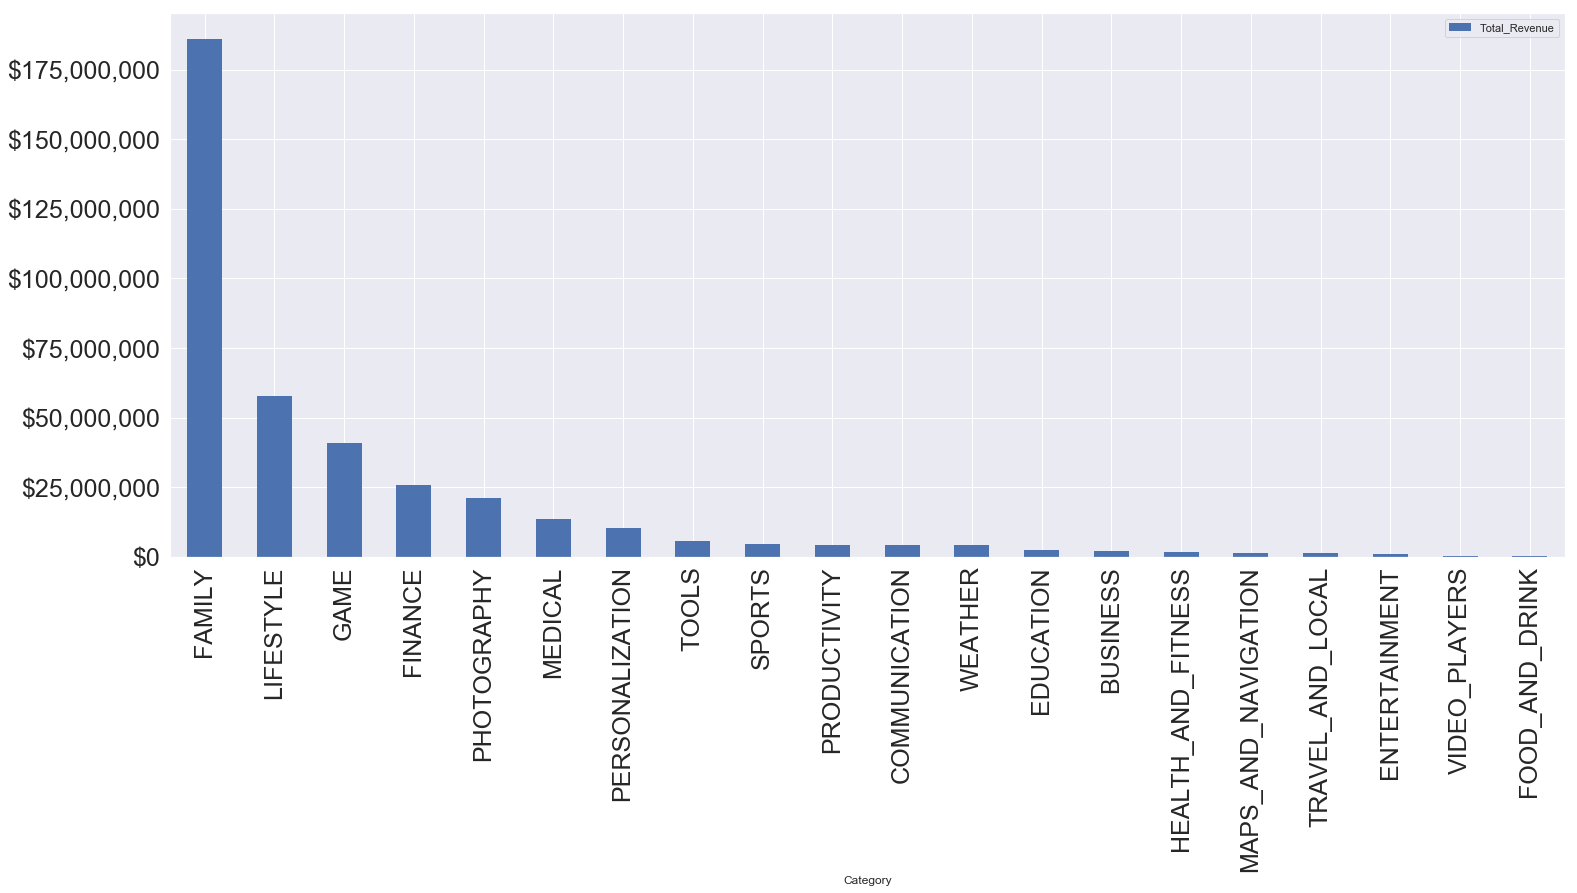

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

k = df.groupby(["Category"]).agg({'Total_Revenue':'sum'}) 
k.columns=['Total_Revenue']
k=k.sort_values('Total_Revenue',ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Total_Revenue']>0].head(20).plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=25)
fmt = '${x:,.0f}'##to get the y axis in dollars.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

# Apps in the Family category is grossing the highest

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,...,0.0,214.0,7.0,19,19.0,19.0,Art_And_Design,1,"(3.0, 11.0]",0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0.0,206.0,7.0,14,14.0,14.0,Art_And_Design,1,"(3.0, 11.0]",0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0.0,8.0,0.0,8.7,8.7,8.7,Art_And_Design,1,"(-0.001, 1.0]",0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0.0,62.0,2.0,25,25.0,25.0,Art_And_Design,1,"(1.0, 3.0]",0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0.0,50.0,2.0,2.8,2.8,2.8,Art_And_Design,1,"(1.0, 3.0]",0.0


# Similarly calculate the highest grossing app

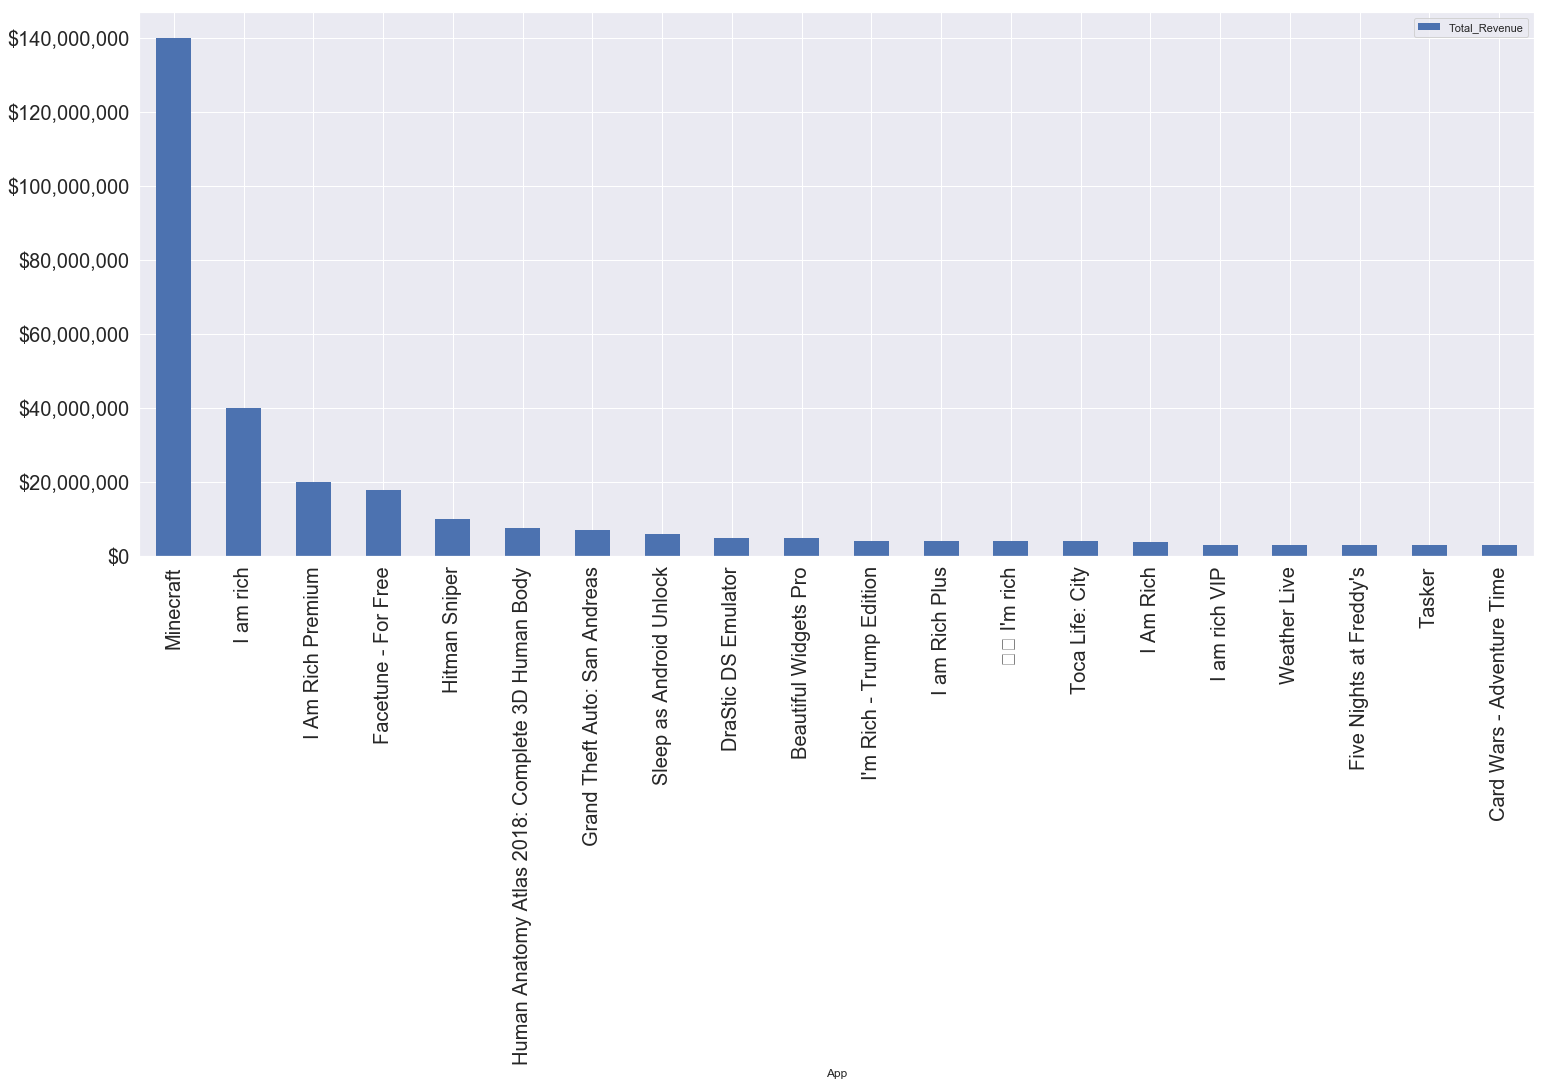

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

k = df.groupby(["App"]).agg({'Total_Revenue':'sum'}) 
k.columns=['Total_Revenue']
k=k.sort_values('Total_Revenue',ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Total_Revenue']>0].head(20).plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=20)
fmt = '${x:,.0f}'##to get the y axis in dollars.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

***Hmm... never heard of this 'I am rich app before'..lets check.

In [34]:
df[df['App'].str.lower().str.contains('am rich')]
##it does seem correct...weird. 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,...,39999000.0,209.0,7.0,1.8,1.8,1.8,Lifestyle,1,"(3.0, 11.0]",399.99
5352,I AM RICH,FAMILY,3.9,1455.0,1.1M,"10,000+",Free,0,Everyone,Entertainment,...,0.0,302.0,10.0,1.1,1.1,1.1,Family,1,"(3.0, 11.0]",0.00
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,...,3999900.0,82.0,3.0,8.7,8.7,8.7,Family,1,"(1.0, 3.0]",399.99
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6M,"10,000+",Paid,$299.99,Everyone,Lifestyle,...,2999900.0,19.0,1.0,2.6,2.6,2.6,Lifestyle,1,"(-0.001, 1.0]",299.99
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,...,19999500.0,270.0,9.0,4.7,4.7,4.7,Finance,1,"(3.0, 11.0]",399.99
5358,I am Rich!,FINANCE,3.8,93.0,22M,"1,000+",Paid,$399.99,Everyone,Finance,...,399990.0,241.0,8.0,22,22.0,22.0,Finance,1,"(3.0, 11.0]",399.99
5359,I am rich(premium),FINANCE,3.5,472.0,965k,"5,000+",Paid,$399.99,Everyone,Finance,...,1999950.0,465.0,15.0,965k,NaN,NaN,Finance,1,"(11.0, 98.0]",399.99
5360,I am Rich Person,LIFESTYLE,4.2,134.0,1.8M,"1,000+",Paid,$37.99,Everyone,Lifestyle,...,37990.0,387.0,13.0,1.8,1.8,1.8,Lifestyle,1,"(11.0, 98.0]",37.99
5361,I am Rich Premium Plus,FINANCE,4.6,459.0,2.0M,"10,000+",Paid,$18.99,Everyone,Finance,...,189900.0,173.0,6.0,2.0,2.0,2.0,Finance,1,"(3.0, 11.0]",18.99
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7M,"5,000+",Paid,$399.99,Everyone,Entertainment,...,1999950.0,436.0,14.0,2.7,2.7,2.7,Family,1,"(11.0, 98.0]",399.99


In [35]:
##lets combine them all into one app. 
Iamrich_list=df[df['App'].str.lower().str.contains('am rich')]['App'].tolist()

#df[df['App'].str.lower().str.contains('am rich')]['App'].tolist()
df.loc[df['App'].isin(Iamrich_list),'App']='I am Rich all Versions'



In [36]:
df[df['App'].str.lower().str.contains('am rich')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
5351,I am Rich all Versions,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,...,39999000.0,209.0,7.0,1.8,1.8,1.8,Lifestyle,1,"(3.0, 11.0]",399.99
5352,I am Rich all Versions,FAMILY,3.9,1455.0,1.1M,"10,000+",Free,0,Everyone,Entertainment,...,0.0,302.0,10.0,1.1,1.1,1.1,Family,1,"(3.0, 11.0]",0.00
5354,I am Rich all Versions,FAMILY,4.0,856.0,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,...,3999900.0,82.0,3.0,8.7,8.7,8.7,Family,1,"(1.0, 3.0]",399.99
5355,I am Rich all Versions,LIFESTYLE,3.8,411.0,2.6M,"10,000+",Paid,$299.99,Everyone,Lifestyle,...,2999900.0,19.0,1.0,2.6,2.6,2.6,Lifestyle,1,"(-0.001, 1.0]",299.99
5356,I am Rich all Versions,FINANCE,4.1,1867.0,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,...,19999500.0,270.0,9.0,4.7,4.7,4.7,Finance,1,"(3.0, 11.0]",399.99
5358,I am Rich all Versions,FINANCE,3.8,93.0,22M,"1,000+",Paid,$399.99,Everyone,Finance,...,399990.0,241.0,8.0,22,22.0,22.0,Finance,1,"(3.0, 11.0]",399.99
5359,I am Rich all Versions,FINANCE,3.5,472.0,965k,"5,000+",Paid,$399.99,Everyone,Finance,...,1999950.0,465.0,15.0,965k,NaN,NaN,Finance,1,"(11.0, 98.0]",399.99
5360,I am Rich all Versions,LIFESTYLE,4.2,134.0,1.8M,"1,000+",Paid,$37.99,Everyone,Lifestyle,...,37990.0,387.0,13.0,1.8,1.8,1.8,Lifestyle,1,"(11.0, 98.0]",37.99
5361,I am Rich all Versions,FINANCE,4.6,459.0,2.0M,"10,000+",Paid,$18.99,Everyone,Finance,...,189900.0,173.0,6.0,2.0,2.0,2.0,Finance,1,"(3.0, 11.0]",18.99
5362,I am Rich all Versions,FAMILY,4.4,201.0,2.7M,"5,000+",Paid,$399.99,Everyone,Entertainment,...,1999950.0,436.0,14.0,2.7,2.7,2.7,Family,1,"(11.0, 98.0]",399.99


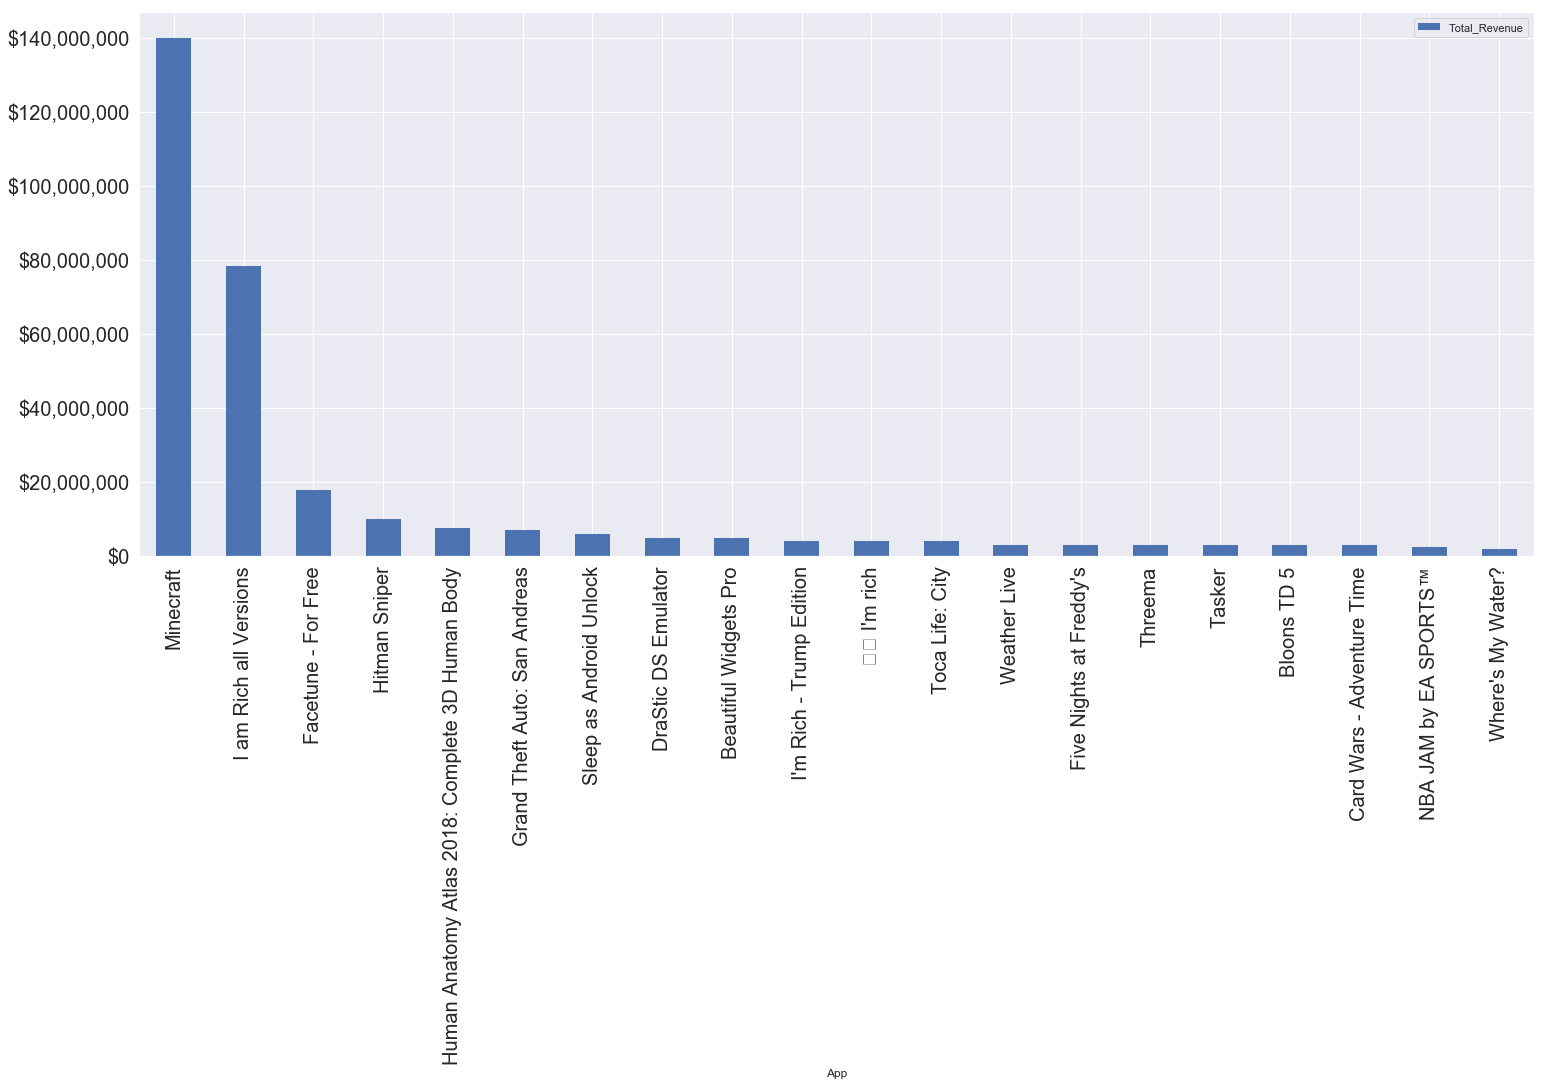

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

k = df.groupby(["App"]).agg({'Total_Revenue':'sum'}) 
k.columns=['Total_Revenue']
k=k.sort_values('Total_Revenue',ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Total_Revenue']>0].head(20).plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=20)
fmt = '${x:,.0f}'##to get the y axis in dollars.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

# The top 3 grossing apps are Minecraft and "I am Rich", and Facetune.

In [38]:
max(df['Total_Revenue'])

69900000.0

In [39]:
df['Total_Revenue']=df['Total_Revenue'].convert_objects(convert_numeric=True)
k = df.groupby(["Total_Revenue"]).agg({'Total_Revenue':'sum'}) 
k.columns=['Total_Revenue']
k=k.sort_values('Total_Revenue',ascending=False)
k.head()

,Total_Revenue
Total_Revenue,
69900000.0,139800000.0
39999000.0,39999000.0
5990000.0,23960000.0
19999500.0,19999500.0
2990000.0,14950000.0


In [40]:
df[df['Total_Revenue']>0].head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,"100,000+",Paid,$4.99,Everyone,Business,...,499000.0,137.0,4.0,6.8,6.8,6.8,Business,1,"(3.0, 11.0]",4.99
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,"100,000+",Paid,$4.99,Everyone,Business,...,499000.0,485.0,16.0,39,39.0,39.0,Business,1,"(11.0, 98.0]",4.99
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,"100,000+",Paid,$4.99,Everyone,Business,...,499000.0,137.0,4.0,6.8,6.8,6.8,Business,1,"(3.0, 11.0]",4.99
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,"100,000+",Paid,$4.99,Everyone,Business,...,499000.0,485.0,16.0,39,39.0,39.0,Business,1,"(11.0, 98.0]",4.99
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,...,399000.0,35.0,1.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",3.99
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,...,39900.0,51.0,2.0,Varies with device,NaN,NaN,Dating,1,"(1.0, 3.0]",3.99
477,Calculator,DATING,2.6,57.0,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,...,6990.0,288.0,9.0,6.2,6.2,6.2,Dating,1,"(3.0, 11.0]",6.99
478,Truth or Dare Pro,DATING,NaN,0.0,20M,50+,Paid,$1.49,Teen,Dating,...,74.5,342.0,11.0,20,20.0,20.0,Dating,1,"(3.0, 11.0]",1.49
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0.0,18k,100+,Paid,$2.99,Everyone,Dating,...,299.0,380.0,12.0,18k,NaN,NaN,Dating,1,"(11.0, 98.0]",2.99
480,Ad Blocker for SayHi,DATING,NaN,4.0,1.2M,100+,Paid,$3.99,Teen,Dating,...,399.0,7.0,0.0,1.2,1.2,1.2,Dating,1,"(-0.001, 1.0]",3.99


In [41]:
df[df['Total_Revenue']>0].sort_values (['Total_Revenue'], ascending=False).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,...,69900000.0,16.0,1.0,Varies with device,NaN,NaN,Family,1,"(-0.001, 1.0]",6.99
4347,Minecraft,FAMILY,4.5,2375336.0,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,...,69900000.0,16.0,1.0,Varies with device,NaN,NaN,Family,1,"(-0.001, 1.0]",6.99
5351,I am Rich all Versions,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,...,39999000.0,209.0,7.0,1.8,1.8,1.8,Lifestyle,1,"(3.0, 11.0]",399.99
5356,I am Rich all Versions,FINANCE,4.1,1867.0,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,...,19999500.0,270.0,9.0,4.7,4.7,4.7,Finance,1,"(3.0, 11.0]",399.99
4034,Hitman Sniper,GAME,4.6,408292.0,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,...,9900000.0,28.0,1.0,29,29.0,29.0,Game,1,"(-0.001, 1.0]",0.99
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26M,"1,000,000+",Paid,$6.99,Mature 17+,Action,...,6990000.0,1237.0,41.0,26,26.0,26.0,Game,1,"(11.0, 98.0]",6.99
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48M,"1,000,000+",Paid,$5.99,Everyone,Photography,...,5990000.0,15.0,0.0,48,48.0,48.0,Photography,1,"(-0.001, 1.0]",5.99
2912,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48M,"1,000,000+",Paid,$5.99,Everyone,Photography,...,5990000.0,15.0,0.0,48,48.0,48.0,Photography,1,"(-0.001, 1.0]",5.99
2950,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48M,"1,000,000+",Paid,$5.99,Everyone,Photography,...,5990000.0,15.0,0.0,48,48.0,48.0,Photography,1,"(-0.001, 1.0]",5.99
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872k,"1,000,000+",Paid,$5.99,Everyone,Lifestyle,...,5990000.0,43.0,1.0,872k,NaN,NaN,Lifestyle,1,"(-0.001, 1.0]",5.99


In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,...,0.0,214.0,7.0,19,19.0,19.0,Art_And_Design,1,"(3.0, 11.0]",0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0.0,206.0,7.0,14,14.0,14.0,Art_And_Design,1,"(3.0, 11.0]",0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0.0,8.0,0.0,8.7,8.7,8.7,Art_And_Design,1,"(-0.001, 1.0]",0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0.0,62.0,2.0,25,25.0,25.0,Art_And_Design,1,"(1.0, 3.0]",0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0.0,50.0,2.0,2.8,2.8,2.8,Art_And_Design,1,"(1.0, 3.0]",0.0


# What category has the bigest average sized apps?


In [43]:
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,...,0.0,214.0,7.0,19,19.0,19.0,Art_And_Design,1,"(3.0, 11.0]",0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0.0,206.0,7.0,14,14.0,14.0,Art_And_Design,1,"(3.0, 11.0]",0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0.0,8.0,0.0,8.7,8.7,8.7,Art_And_Design,1,"(-0.001, 1.0]",0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0.0,62.0,2.0,25,25.0,25.0,Art_And_Design,1,"(1.0, 3.0]",0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0.0,50.0,2.0,2.8,2.8,2.8,Art_And_Design,1,"(1.0, 3.0]",0.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0,Everyone,Art & Design,...,0.0,501.0,16.0,5.6,5.6,5.6,Art_And_Design,1,"(11.0, 98.0]",0.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19M,"50,000+",Free,0,Everyone,Art & Design,...,0.0,105.0,3.0,19,19.0,19.0,Art_And_Design,1,"(1.0, 3.0]",0.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29M,"1,000,000+",Free,0,Everyone,Art & Design,...,0.0,56.0,2.0,29,29.0,29.0,Art_And_Design,1,"(1.0, 3.0]",0.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33M,"1,000,000+",Free,0,Everyone,Art & Design,...,0.0,323.0,11.0,33,33.0,33.0,Art_And_Design,1,"(3.0, 11.0]",0.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,...,0.0,37.0,1.0,3.1,3.1,3.1,Art_And_Design,1,"(-0.001, 1.0]",0.0


In [44]:
df.dtypes

App                                 object
Category                            object
Rating                             float64
Reviews                            float64
Size                                object
Installs                            object
Type                                object
Price                               object
Content Rating                      object
Genres                              object
Last Updated                datetime64[ns]
Current Ver                         object
Android Ver                         object
Price_num                          float64
Paid_App_Price                     float64
Installs_num                       float64
Total_Revenue                      float64
Recency                            float64
Recency_Months                     float64
Size_num                            object
Size_num2                          float64
Size_true                          float64
Category_propercase                 object
Apps       

In [45]:
df[df['Size_num2']>0].sort_values (['Size_num2'], ascending=False).head(100)
#We find that the max size an app is is 100M.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933.0,100M,"5,000,000+",Free,0,Everyone,Sports,...,0.0,90.0,3.0,100,100.0,100.0,Sports,1,"(1.0, 3.0]",0.00
5530,The Walking Dead: Our World,GAME,4.0,22435.0,100M,"1,000,000+",Free,0,Teen,Action,...,0.0,8.0,0.0,100,100.0,100.0,Game,1,"(-0.001, 1.0]",0.00
5865,Gangster Town: Vice District,FAMILY,4.3,65146.0,100M,"10,000,000+",Free,0,Mature 17+,Simulation,...,0.0,70.0,2.0,100,100.0,100.0,Family,1,"(1.0, 3.0]",0.00
5862,Miami crime simulator,GAME,4.0,254518.0,100M,"10,000,000+",Free,0,Mature 17+,Action,...,0.0,31.0,1.0,100,100.0,100.0,Game,1,"(-0.001, 1.0]",0.00
2299,Navi Radiography Pro,MEDICAL,4.7,11.0,100M,500+,Paid,$15.99,Everyone,Medical,...,7995.0,207.0,7.0,100,100.0,100.0,Medical,1,"(3.0, 11.0]",15.99
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124.0,100M,"5,000+",Free,0,Everyone,Health & Fitness,...,0.0,7.0,0.0,100,100.0,100.0,Health_And_Fitness,1,"(-0.001, 1.0]",0.00
7404,SimCity BuildIt,FAMILY,4.5,4218587.0,100M,"50,000,000+",Free,0,Everyone 10+,Simulation,...,0.0,51.0,2.0,100,100.0,100.0,Family,1,"(1.0, 3.0]",0.00
3973,Hungry Shark Evolution,GAME,4.5,6071542.0,100M,"100,000,000+",Free,0,Teen,Arcade,...,0.0,15.0,0.0,100,100.0,100.0,Game,1,"(-0.001, 1.0]",0.00
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458.0,100M,"5,000,000+",Free,0,Everyone,Sports,...,0.0,20.0,1.0,100,100.0,100.0,Game,1,"(-0.001, 1.0]",0.00
1758,Hungry Shark Evolution,GAME,4.5,6074334.0,100M,"100,000,000+",Free,0,Teen,Arcade,...,0.0,15.0,0.0,100,100.0,100.0,Game,1,"(-0.001, 1.0]",0.00


In [46]:
#What categories have the largest apps?

k = df.groupby(["Category"]).agg({'Size_num2':'mean'})
k.columns=['Size_Total']
k=k.sort_values("Size_Total",ascending=False).head(10)
k

,Size_Total
Category,
GAME,44.500198
FAMILY,28.812833
TRAVEL_AND_LOCAL,24.912632
SPORTS,24.647883
HEALTH_AND_FITNESS,23.282946
PARENTING,22.512963
FOOD_AND_DRINK,22.185000
ENTERTAINMENT,21.853333
EDUCATION,21.162385


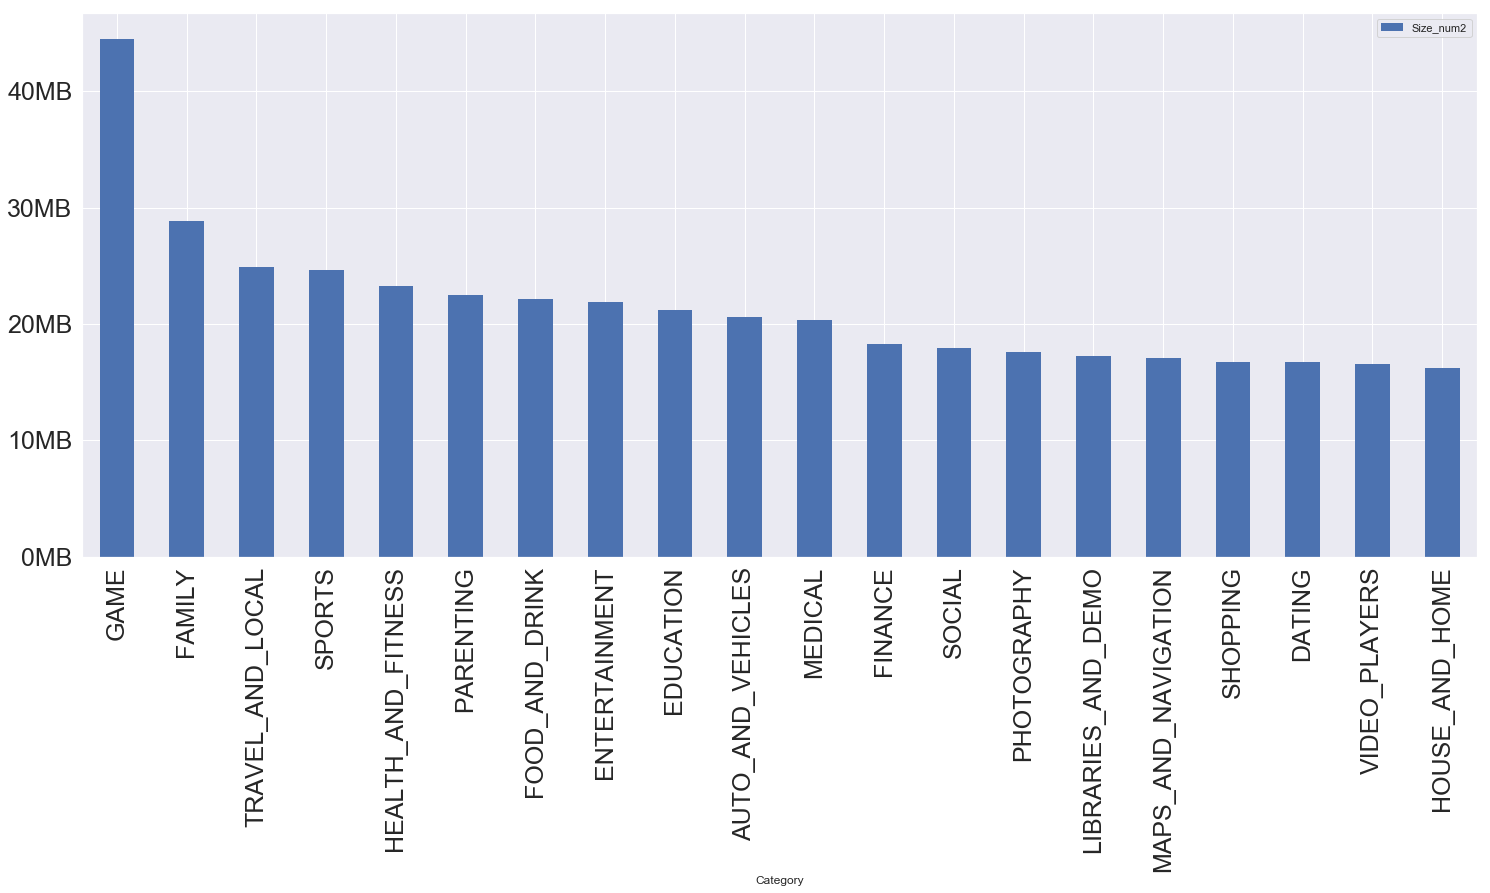

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

k = df.groupby(["Category"]).agg({'Size_num2':'mean'}) 
k.columns=['Size_num2']
k=k.sort_values('Size_num2',ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Size_num2']>0].head(20).plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=25)
fmt = '{x:,.0f}MB'##to get the y axis in dollars.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

## On average, games have the largest app size which makes sense because of how much data is required for games.

# Which app has the highest Ratings?

In [48]:
#Which app has the highest Ratings?
df[df['Rating']>0].sort_values (['Rating'], ascending=False).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
9056,Santa's Monster Shootout DX,GAME,5.0,4.0,33M,50+,Paid,$1.99,Teen,Action,...,99.5,1820.0,60.0,33,33.0,33.0,Game,1,"(11.0, 98.0]",1.99
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3.0,5.7M,100+,Free,0,Everyone,News & Magazines,...,0.0,75.0,2.0,5.7,5.7,5.7,News_And_Magazines,1,"(1.0, 3.0]",0.00
8493,PK and DK Audio App,FAMILY,5.0,2.0,3.9M,100+,Free,0,Everyone,Entertainment,...,0.0,288.0,9.0,3.9,3.9,3.9,Family,1,"(3.0, 11.0]",0.00
6330,HON. B.J. ACS COLLEGE ALE,FAMILY,5.0,3.0,1.8M,100+,Free,0,Mature 17+,Education,...,0.0,591.0,19.0,1.8,1.8,1.8,Family,1,"(11.0, 98.0]",0.00
6342,BJ Foods,BUSINESS,5.0,3.0,1.5M,10+,Free,0,Everyone,Business,...,0.0,183.0,6.0,1.5,1.5,1.5,Business,1,"(3.0, 11.0]",0.00
6363,Read it easy for BK,LIFESTYLE,5.0,1.0,3.2M,50+,Free,0,Everyone,Lifestyle,...,0.0,25.0,1.0,3.2,3.2,3.2,Lifestyle,1,"(-0.001, 1.0]",0.00
9766,ER Assist,PRODUCTIVITY,5.0,3.0,28M,10+,Free,0,Everyone,Productivity,...,0.0,611.0,20.0,28,28.0,28.0,Productivity,1,"(11.0, 98.0]",0.00
6364,BK Video Status,FAMILY,5.0,13.0,2.1M,100+,Free,0,Everyone,Entertainment,...,0.0,33.0,1.0,2.1,2.1,2.1,Family,1,"(-0.001, 1.0]",0.00
6372,BK Formula Calculator,TOOLS,5.0,6.0,11M,100+,Free,0,Everyone,Tools,...,0.0,1097.0,36.0,11,11.0,11.0,Tools,1,"(11.0, 98.0]",0.00
6375,Dr Bk Sachin bhai,LIFESTYLE,5.0,19.0,3.1M,"1,000+",Free,0,Everyone,Lifestyle,...,0.0,245.0,8.0,3.1,3.1,3.1,Lifestyle,1,"(3.0, 11.0]",0.00


In [49]:
df[df['Rating']>0].sort_values (['Installs_num'], ascending=False).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13M,"1,000,000,000+",Free,0,Teen,News & Magazines,...,0.0,8.0,0.0,13,13.0,13.0,News_And_Magazines,1,"(-0.001, 1.0]",0.0
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,8.0,0.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",0.0
451,Gmail,COMMUNICATION,4.3,4604483.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,7.0,0.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",0.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Travel & Local,...,0.0,9.0,0.0,Varies with device,NaN,NaN,Travel_And_Local,1,"(-0.001, 1.0]",0.0
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13M,"1,000,000,000+",Free,0,Teen,News & Magazines,...,0.0,8.0,0.0,13,13.0,13.0,News_And_Magazines,1,"(-0.001, 1.0]",0.0
1654,Subway Surfers,GAME,4.5,27722264.0,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,...,0.0,28.0,1.0,76,76.0,76.0,Game,1,"(-0.001, 1.0]",0.0
5395,Google Photos,PHOTOGRAPHY,4.5,10847682.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,...,0.0,8.0,0.0,Varies with device,NaN,NaN,Photography,1,"(-0.001, 1.0]",0.0
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,8.0,0.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",0.0
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,...,0.0,3.0,0.0,Varies with device,NaN,NaN,Productivity,1,"(-0.001, 1.0]",0.0
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,...,0.0,24.0,1.0,Varies with device,NaN,NaN,Entertainment,1,"(-0.001, 1.0]",0.0


# Is there a strong correlation between App ratings and number of installs?

In [50]:
#Is there a strong correlation between App ratings and number of installs?

df["Rating"].corr(df["Installs_num"])


0.05135456605599934

# .05 is very low so this is considerered low correlation.

# Which category of apps is the most popular based on number of installs.


In [51]:
# Which category of apps is the most popular based on number of installs.

df[df['Installs_num']>0].sort_values (['Installs_num'], ascending=False).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Total_Revenue,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,8.0,0.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,...,0.0,3.0,0.0,Varies with device,NaN,NaN,Video_Players,1,"(-0.001, 1.0]",0.0
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13M,"1,000,000,000+",Free,0,Teen,News & Magazines,...,0.0,8.0,0.0,13,13.0,13.0,News_And_Magazines,1,"(-0.001, 1.0]",0.0
3896,Subway Surfers,GAME,4.5,27711703.0,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,...,0.0,28.0,1.0,76,76.0,76.0,Game,1,"(-0.001, 1.0]",0.0
4144,Google+,SOCIAL,4.2,4828372.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,...,0.0,14.0,0.0,Varies with device,NaN,NaN,Social,1,"(-0.001, 1.0]",0.0
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,...,0.0,9.0,0.0,Varies with device,NaN,NaN,Social,1,"(-0.001, 1.0]",0.0
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,...,0.0,6.0,0.0,Varies with device,NaN,NaN,Social,1,"(-0.001, 1.0]",0.0
468,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,6.0,0.0,Varies with device,NaN,NaN,Communication,1,"(-0.001, 1.0]",0.0
3565,Google Drive,PRODUCTIVITY,4.4,2731211.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,...,0.0,3.0,0.0,Varies with device,NaN,NaN,Productivity,1,"(-0.001, 1.0]",0.0
4150,Google,TOOLS,4.4,8021623.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,...,0.0,6.0,0.0,Varies with device,NaN,NaN,Tools,1,"(-0.001, 1.0]",0.0


In [52]:
k = df.groupby(["Category"]).agg({'Installs_num':'sum'}) 
k.columns=['Installs_num']
k=k.sort_values('Installs_num', ascending=False)
k



,Installs_num
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


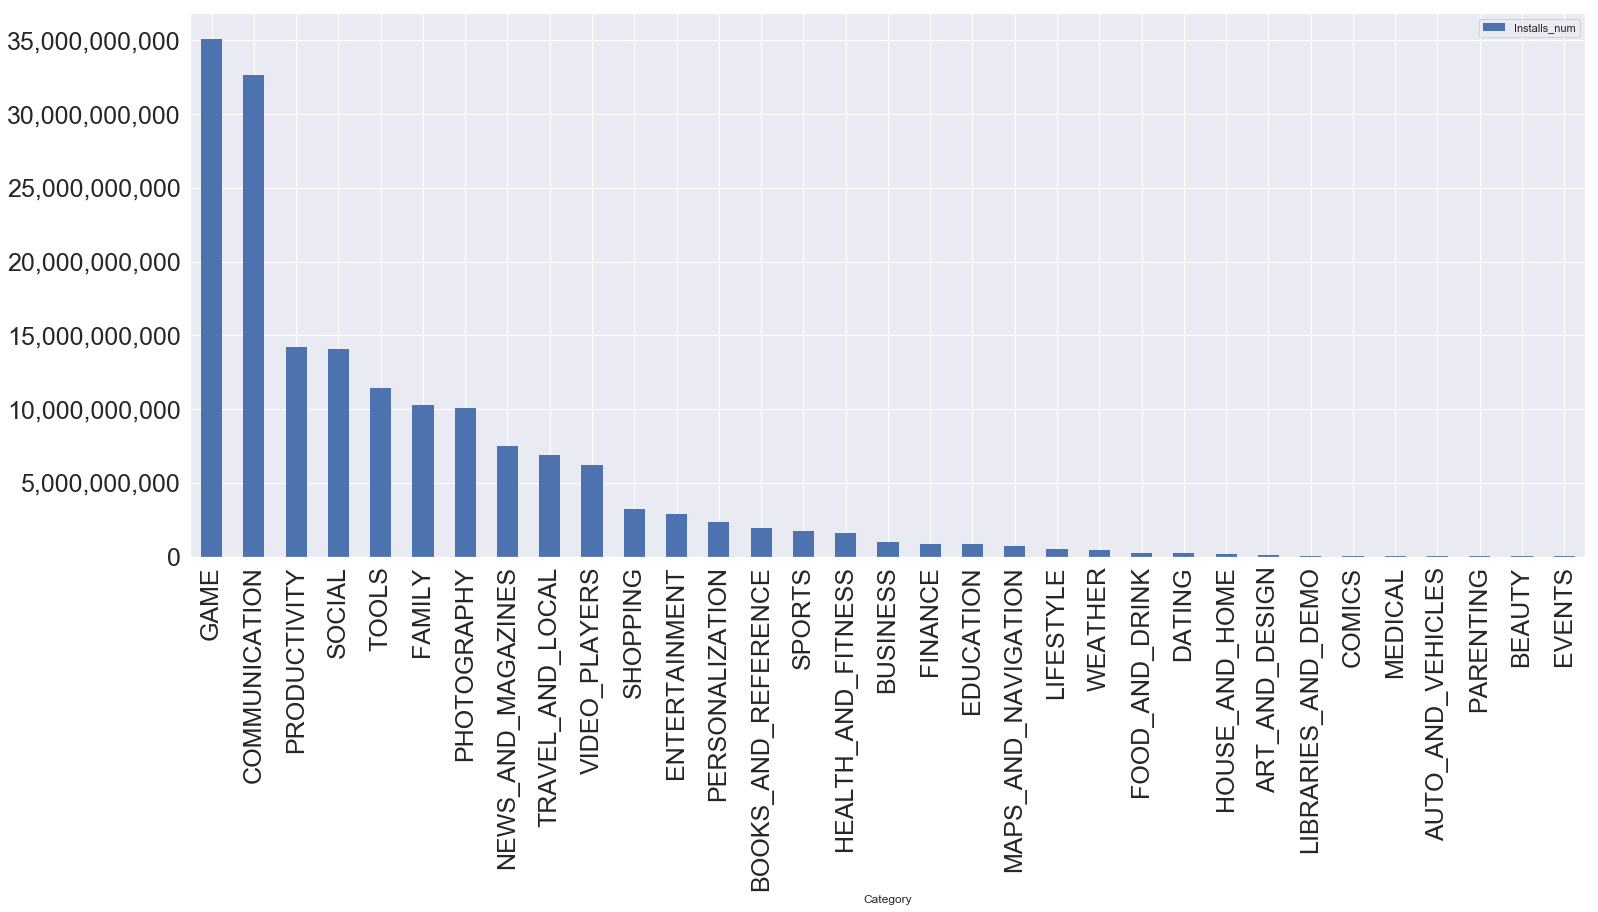

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Installs_num']>0].plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=25)
fmt = '{x:,.0f}'##to get the y axis in comma puntuated values -- for example not 40000000, but 400,000,000.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.show()

# Apps categorized in Games and Communication are the most popularly downloaded apps in Google Playstore.

In [54]:
#What are the top top most popular apps downloaded? 

k = df.groupby(["App"]).agg({'Installs_num':'sum'}) 
k.columns=['Installs_num']
k=k.sort_values('Installs_num', ascending=False)
k.head(10)


,Installs_num
App,
Subway Surfers,6.000000e+09
Hangouts,4.000000e+09
Google Drive,4.000000e+09
Google News,4.000000e+09
Google Photos,4.000000e+09
Instagram,4.000000e+09
Candy Crush Saga,3.500000e+09
Messenger – Text and Video Chat for Free,3.000000e+09
Google Chrome: Fast & Secure,3.000000e+09


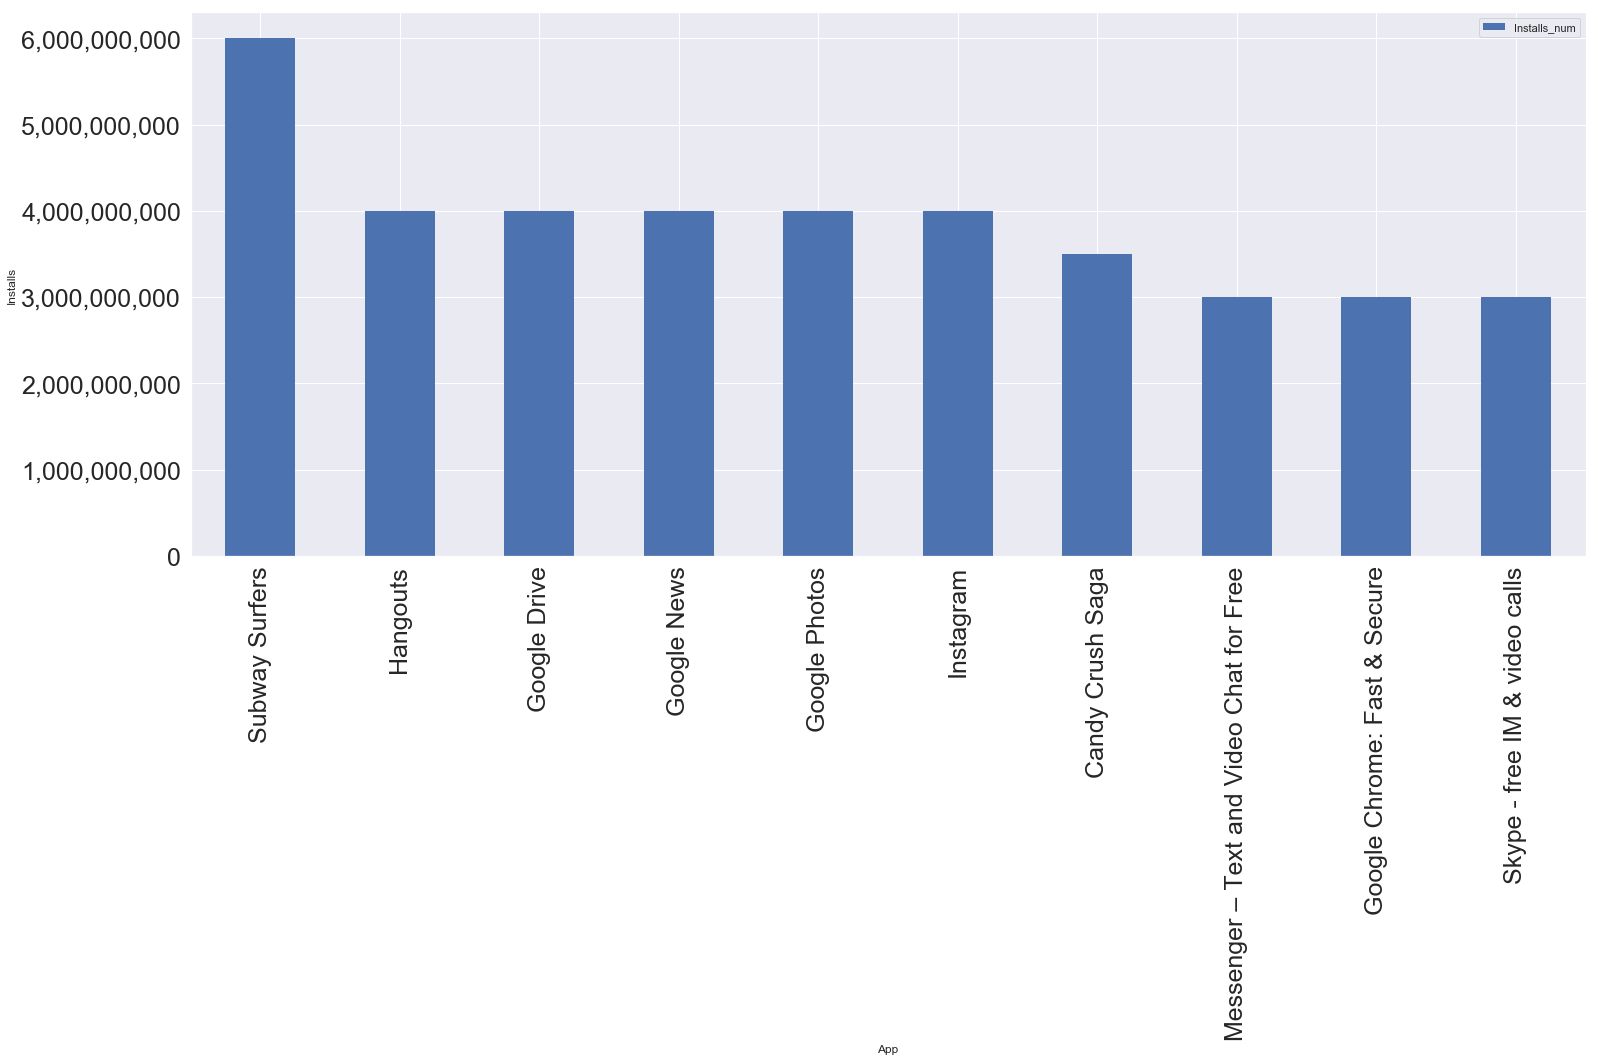

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

k = df.groupby(["App"]).agg({'Installs_num':'sum'}) 
k.columns=['Installs_num']
k=k.sort_values('Installs_num', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
k[k['Installs_num']>0].head(10).plot(kind='bar',align='center', width=.5, edgecolor='none' , ax=ax,fontsize=25)
fmt = '{x:,.0f}'##to get the y axis in dollars.
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel('Installs')

plt.show()

# The most popular downloaded apps are Subway Surfers, Google Photos, and Instagram.

In [56]:
# What are the top 2 most popular apps in each category based on install and revenue?
k = df.groupby(["Category","App"]).agg({'Installs_num':'sum'})
k.columns=['Install_Total']
k=k.sort_values(["Category","Install_Total"],ascending=[True,False])
k=k[k['Install_Total']>0]
k1=k.reset_index()
k1['count'] = k1.groupby('Category').cumcount()+1
k1[k1['count']<3]

,Category,App,Install_Total,count
0,ART_AND_DESIGN,Sketch - Draw & Paint,5.000000e+07,1
1,ART_AND_DESIGN,Textgram - write on photos,2.000000e+07,2
63,AUTO_AND_VEHICLES,"Android Auto - Maps, Media, Messaging & Voice",1.000000e+07,1
64,AUTO_AND_VEHICLES,AutoScout24 - used car finder,1.000000e+07,2
148,BEAUTY,Beauty Camera - Selfie Camera,1.000000e+07,1
149,BEAUTY,Best Hairstyles step by step,5.000000e+06,2
201,BOOKS_AND_REFERENCE,Google Play Books,1.000000e+09,1
202,BOOKS_AND_REFERENCE,Amazon Kindle,2.000000e+08,2
423,BUSINESS,OfficeSuite : Free Office + PDF Editor,2.000000e+08,1
424,BUSINESS,Docs To Go™ Free Office Suite,1.000000e+08,2


In [57]:
# Draw histograms of ratings, installs, revenue and recency to see what the distribution is like, Are they normally distributed?
df.describe()


,Rating,Reviews,Price_num,Paid_App_Price,Installs_num,Total_Revenue,Recency,Recency_Months,Size_num2,Size_true,Apps,Price_num2
count,9366.000000,1.084000e+04,10840.000000,800.000000,1.084000e+04,1.084000e+04,10840.000000,10840.000000,8829.000000,8829.000000,10840.0,10840.000000
mean,4.191757,4.441529e+05,1.027368,13.920837,1.546434e+07,3.585142e+04,260.720111,8.511716,22.270540,22.270540,1.0,1.027368
std,0.515219,2.927761e+06,15.949703,57.195358,8.502936e+07,1.065980e+06,394.610990,12.969467,22.628691,22.628691,0.0,15.949703
min,1.000000,0.000000e+00,0.000000,0.990000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.0,0.000000
25%,4.000000,3.800000e+01,0.000000,1.490000,1.000000e+03,0.000000e+00,20.000000,1.000000,5.400000,5.400000,1.0,0.000000
50%,4.300000,2.094000e+03,0.000000,2.990000,1.000000e+05,0.000000e+00,77.000000,3.000000,14.000000,14.000000,1.0,0.000000
75%,4.500000,5.477550e+04,0.000000,4.990000,5.000000e+06,0.000000e+00,323.000000,11.000000,31.000000,31.000000,1.0,0.000000
max,5.000000,7.815831e+07,400.000000,400.000000,1.000000e+09,6.990000e+07,3002.000000,98.000000,100.000000,100.000000,1.0,400.000000


In [58]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_num', 'Paid_App_Price', 'Installs_num',
       'Total_Revenue', 'Recency', 'Recency_Months', 'Size_num', 'Size_num2',
       'Size_true', 'Category_propercase', 'Apps', 'Recency_Months_quartiles',
       'Price_num2'],
      dtype='object')

Text(0.5, 0, 'Ratings')

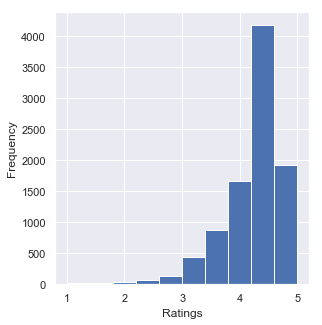

In [59]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 20})

plt.subplot(1, 2, 1)
fig = df[df['Rating']<=5]['Rating'].hist(bins=10)
fig.set_ylabel('Frequency')
fig.set_xlabel('Ratings')



In [60]:
df['Rating'].max()
# Need to remove Ratings over 5. Data seems to have an error. Not a normal distribution due to skewed ratings. 


5.0

In [61]:
df[df['Installs_num']>1000]['Installs_num'].value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
5.000000e+06     752
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
5.000000e+07     289
5.000000e+08      72
1.000000e+09      58
Name: Installs_num, dtype: int64

Text(0.5, 0, 'Installs')

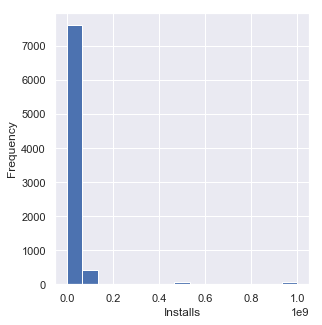

In [62]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 20})
plt.subplot(1, 2, 1)
fig = df[df['Installs_num']>1000]['Installs_num'].hist(bins=15)
fig.set_ylabel('Frequency')
fig.set_xlabel('Installs')

(0, 100)

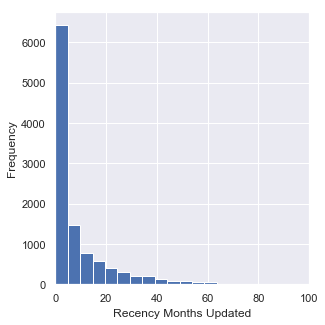

In [63]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 20})

plt.subplot(1, 2, 1)
fig = df['Recency_Months'].hist(bins=20)
fig.set_ylabel('Frequency')
fig.set_xlabel('Recency Months Updated')
plt.xlim([0,100])


In [64]:
# Not a normal distribution. Most apps are updated within the latest 2 years.


Text(0.5, 0, 'Revenue')

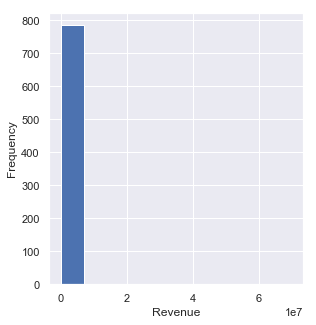

In [65]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 20})

plt.subplot(1, 2, 1)
hist= df[df['Total_Revenue']>0]###huge majority are free apps so it will totally skewed to 0.
fig =hist['Total_Revenue'].hist(bins=10)
fig.set_ylabel('Frequency')
fig.set_xlabel('Revenue')



In [66]:
df['Total_Revenue'].value_counts()

0.00          10050
29900.00         29
990.00           26
299000.00        25
9.90             24
99.00            22
2990.00          17
9900.00          16
499000.00        16
19900.00         15
149.00           14
39900.00         13
4990.00          13
1990.00          13
49900.00         12
149500.00        11
4950.00          11
3990.00          11
14950.00         10
24950.00         10
19950.00          9
199.00            9
495.00            9
990000.00         9
399000.00         8
2490.00           8
49.50             8
0.99              8
29.90             7
9950.00           7
              ...  
36.10             1
299.50            1
290000.00         1
349.00            1
1990.00           1
799000.00         1
100.00            1
22450.00          1
9900000.00        1
1245000.00        1
1499500.00        1
499500.00         1
1610.00           1
1199000.00        1
1499000.00        1
6990000.00        1
1500.00           1
169900.00         1
449.50            1


In [67]:
df['Type_Binary'] = df["Type"]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2,Type_Binary
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,...,214.0,7.0,19,19.0,19.0,Art_And_Design,1,"(3.0, 11.0]",0.0,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,206.0,7.0,14,14.0,14.0,Art_And_Design,1,"(3.0, 11.0]",0.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,8.0,0.0,8.7,8.7,8.7,Art_And_Design,1,"(-0.001, 1.0]",0.0,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,...,62.0,2.0,25,25.0,25.0,Art_And_Design,1,"(1.0, 3.0]",0.0,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,50.0,2.0,2.8,2.8,2.8,Art_And_Design,1,"(1.0, 3.0]",0.0,Free


In [68]:
# Change the yes no data to 1 and 0 so that it can be plotted
binary_map = {"Paid" : 1, "Free" : 0, "0" : 0, "NaN" : 0,}
cat_to_binary = ['Type_Binary']
for var in cat_to_binary:
    df[var]=df[var].map(binary_map)
df.tail(200)  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Recency,Recency_Months,Size_num,Size_num2,Size_true,Category_propercase,Apps,Recency_Months_quartiles,Price_num2,Type_Binary
10641,WSVN - 7 News Miami,NEWS_AND_MAGAZINES,4.5,3320.0,14M,"100,000+",Free,0,Everyone,News & Magazines,...,6.0,0.0,14,14.0,14.0,News_And_Magazines,1,"(-0.001, 1.0]",0.00,0.0
10642,WICShopper,SHOPPING,3.9,3023.0,Varies with device,"500,000+",Free,0,Everyone,Shopping,...,14.0,0.0,Varies with device,NaN,NaN,Shopping,1,"(-0.001, 1.0]",0.00,0.0
10643,First Federal Bank of Florida,FINANCE,4.3,133.0,30M,"10,000+",Free,0,Everyone,Finance,...,78.0,3.0,30,30.0,30.0,Finance,1,"(1.0, 3.0]",0.00,0.0
10644,South Florida MLS,LIFESTYLE,4.4,133.0,13M,"10,000+",Free,0,Everyone,Lifestyle,...,68.0,2.0,13,13.0,13.0,Lifestyle,1,"(1.0, 3.0]",0.00,0.0
10645,Football Manager Mobile 2018,SPORTS,3.9,11460.0,Varies with device,"100,000+",Paid,$8.99,Everyone,Sports,...,43.0,1.0,Varies with device,NaN,NaN,Sports,1,"(-0.001, 1.0]",8.99,1.0
10646,Podcast App: Free & Offline Podcasts by Player FM,NEWS_AND_MAGAZINES,4.6,66407.0,19M,"1,000,000+",Free,0,Teen,News & Magazines,...,15.0,0.0,19,19.0,19.0,News_And_Magazines,1,"(-0.001, 1.0]",0.00,0.0
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815.0,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,...,99.0,3.0,Varies with device,NaN,NaN,Video_Players,1,"(1.0, 3.0]",0.00,0.0
10648,FN Cam,PHOTOGRAPHY,3.4,181.0,10M,"10,000+",Free,0,Everyone,Photography,...,939.0,31.0,10,10.0,10.0,Photography,1,"(11.0, 98.0]",0.00,0.0
10649,How it Works: FN SCAR assault rifle,FAMILY,4.6,44.0,45M,"10,000+",Free,0,Everyone,Casual,...,212.0,7.0,45,45.0,45.0,Family,1,"(3.0, 11.0]",0.00,0.0
10650,FN pistol Model 1906 explained,BOOKS_AND_REFERENCE,NaN,1.0,5.3M,10+,Paid,$5.49,Everyone,Books & Reference,...,518.0,17.0,5.3,5.3,5.3,Books_And_Reference,1,"(11.0, 98.0]",5.49,1.0


# ttest to compare if paid or free apps  are different from a statistical standpoint

In [69]:
import math
from scipy.stats import ttest_ind

app_free=df[(df['Type']=='Free')]
app_free=app_free[['Rating']].dropna()
sample_num=math.floor(len(app_free)*.50)
app_free_sample=np.random.choice(app_free['Rating'],sample_num, replace=True)##randomly select a sample from the data

In [70]:
app_paid=df[(df['Type']=='Paid')]
app_paid=app_paid[['Rating']].dropna()
app_paid_sample=np.random.choice(app_paid['Rating'],sample_num, replace=True)##randomly select a sample from the data

In [71]:
print('mean sample of free apps', app_free_sample.mean())
print('mean sample of paid apps', app_paid_sample.mean())

mean sample of free apps 4.189607708189952
mean sample of paid apps 4.282564808442302


In [72]:
app_free_sample

array([4.4, 4.2, 4.6, ..., 5. , 4.9, 4.1])

In [73]:
diff_app_mean= app_paid_sample.mean() - app_free_sample.mean()
print('diff = ', diff_app_mean)

diff =  0.0929571002523506


In [74]:
size = np.array([len(app_paid_sample), len(app_free_sample)])
sd = np.array([app_paid_sample.std(), app_free_sample.std()])
var = np.array([app_paid_sample.var(), app_free_sample.std()])


diff_app_se= (sum(sd ** 2 / size)) **0.5
print('size of sample = ', size)
print('standard deviation',sd)
print('variance',var)
print('T-value=',diff_app_mean/diff_app_se)

size of sample =  [4359 4359]
standard deviation [0.53665694 0.52022178]
variance [0.28800067 0.52022178]
T-value= 8.211326880664435


In [75]:
print('The outcome of the app ttest')
print(ttest_ind(app_paid_sample, app_free_sample, equal_var=False))

The outcome of the app ttest
Ttest_indResult(statistic=8.210384944684204, pvalue=2.520016748025759e-16)


# The pvalue is less than 0.05 therefore, the two populations are different so we reject the null hypothesis.

# Are ratings different amongst different categories? Are family type apps rated different from gaming type apps?

In [76]:
import math
from scipy.stats import ttest_ind

cat_fam_parenting=df[(df['Category'].isin(['FAMILY','PARENTING']))].dropna()
cat_game_ent=df[(df['Category'].isin(['GAME','ENTERTAINMENT']))].dropna()
sample_num=math.floor(len(cat_fam_parenting)*.50)
cat_fam_parenting_sample=np.random.choice(cat_fam_parenting['Rating'],sample_num, replace=True)##randomly select a sample from the data

In [77]:
sample_num=math.floor(len(cat_game_ent)*.50)
cat_game_ent_sample=np.random.choice(cat_game_ent['Rating'],sample_num, replace=True)##randomly select a sample from the data

In [78]:
print('mean sample of family and parenting apps', cat_fam_parenting_sample.mean())
print('mean sample of game and entertainment apps', cat_game_ent_sample.mean())

mean sample of family and parenting apps 4.344594594594596
mean sample of game and entertainment apps 4.436842105263157


In [79]:
diff_cat_mean= cat_fam_parenting_sample.mean() - cat_game_ent_sample.mean()
print('diff = ', diff_cat_mean)

diff =  -0.09224751066856118


In [80]:
size = np.array([len(cat_fam_parenting_sample), len(cat_game_ent_sample)])
sd = np.array([cat_fam_parenting_sample.std(), cat_game_ent_sample.std()])
var = np.array([cat_fam_parenting_sample.var(), cat_game_ent_sample.std()])


diff_app_se= (sum(sd ** 2 / size)) **0.5
print('size of sample = ', size)
print('standard deviation',sd)
print('variance',var)
print('T-value=',diff_app_mean/diff_app_se)

size of sample =  [74 38]
standard deviation [0.49241322 0.36664988]
variance [0.24247078 0.36664988]
T-value= 1.1260853513382585


In [81]:
print('The outcome of the category ttest')
print(ttest_ind(cat_fam_parenting_sample, cat_game_ent_sample, equal_var=False))

The outcome of the category ttest
Ttest_indResult(statistic=-1.106144226056022, pvalue=0.271450575460062)


# The pvalue is more than 0.05 therefore, the two populations are similar so we fail to reject null hypothesis.

In [82]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_num', 'Paid_App_Price', 'Installs_num',
       'Total_Revenue', 'Recency', 'Recency_Months', 'Size_num', 'Size_num2',
       'Size_true', 'Category_propercase', 'Apps', 'Recency_Months_quartiles',
       'Price_num2', 'Type_Binary'],
      dtype='object')

In [83]:
from pandas.tseries.offsets import MonthEnd
df['Month'] = pd.to_datetime(df['Last Updated'], format="%Y%m") + MonthEnd(1)

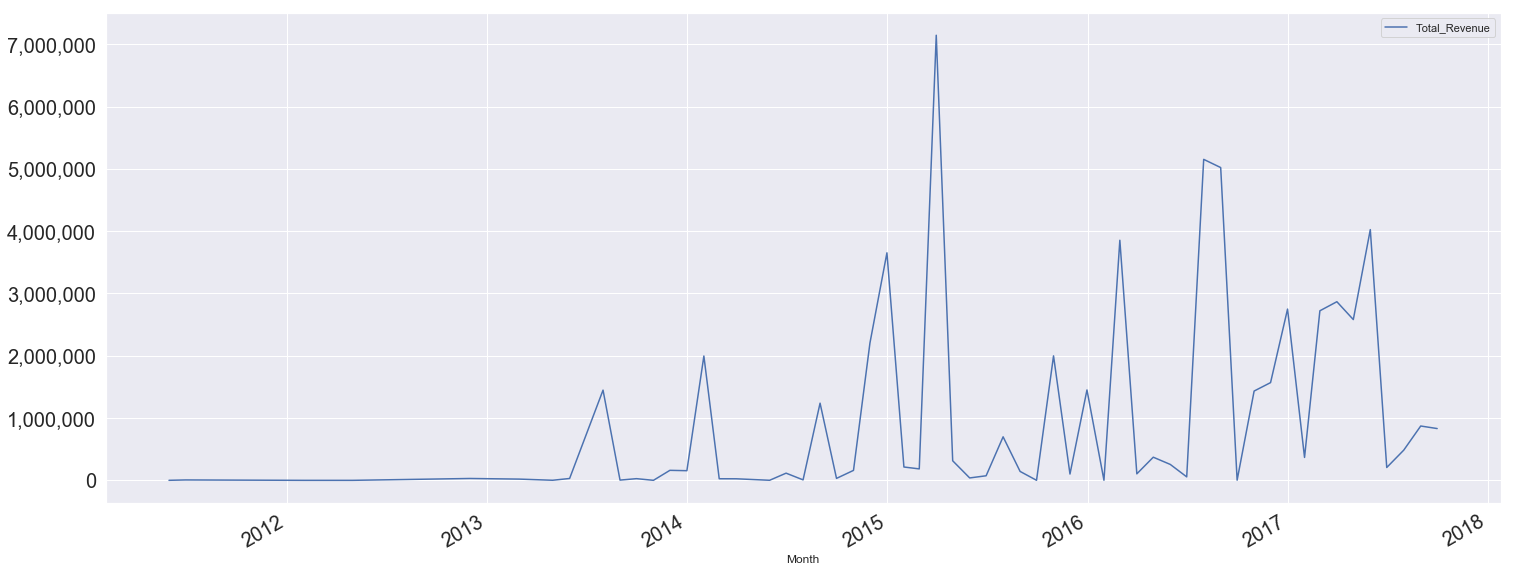

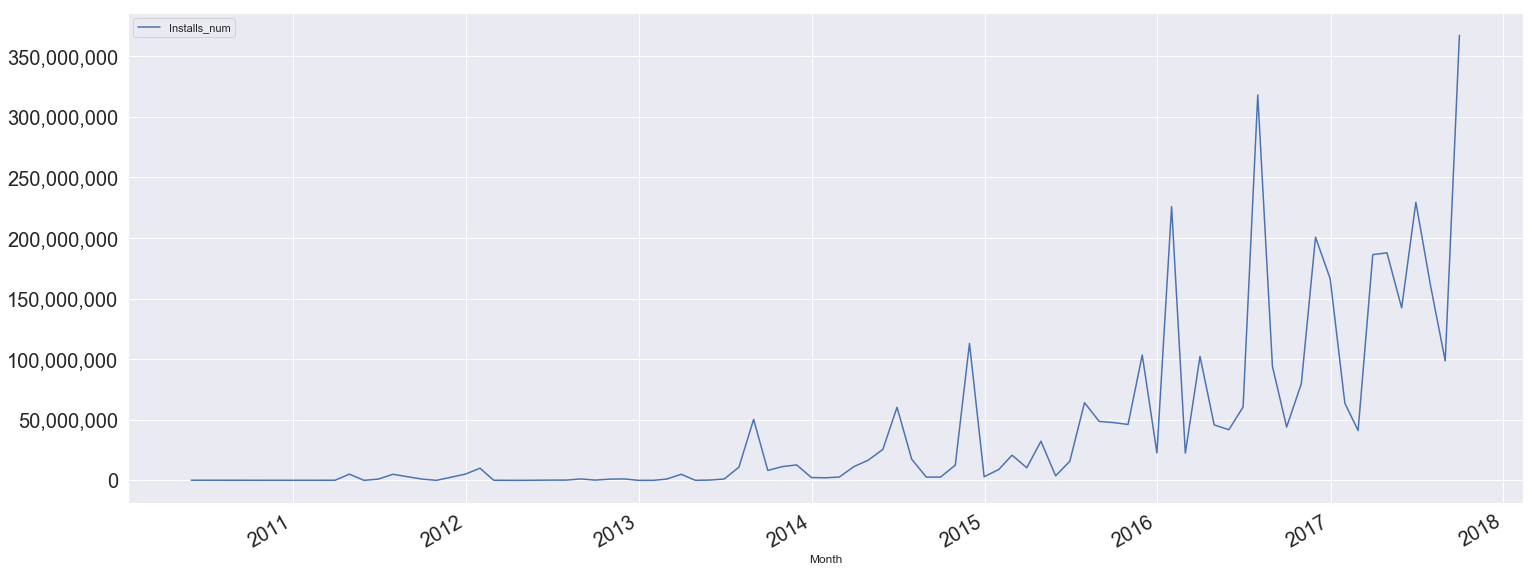

In [84]:

for var in ['Total_Revenue','Installs_num']:
    from pylab import rcParams
    rcParams['figure.figsize'] = 20, 10

    k = df[df['Month']<'2017-10-31'].groupby(["Month"]).agg({var:'sum'}) 
    k.columns=[var]
    k=k.sort_values(var,ascending=False)
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    k[k[var]>0].sort_values('Month').plot(kind='line', ax=ax,fontsize=20)
    fmt = '{x:,.0f}'##to get the y axis in comma puntuated values -- for example not 40000000, but 400,000,000.
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 


    plt.show()

##tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 


#plt.show()

## The installs chart is very sporadic because the data provided does not give exact number of installs. There are given in intervals of 10k+, 50k+, 100k+, and 500k+ etc.

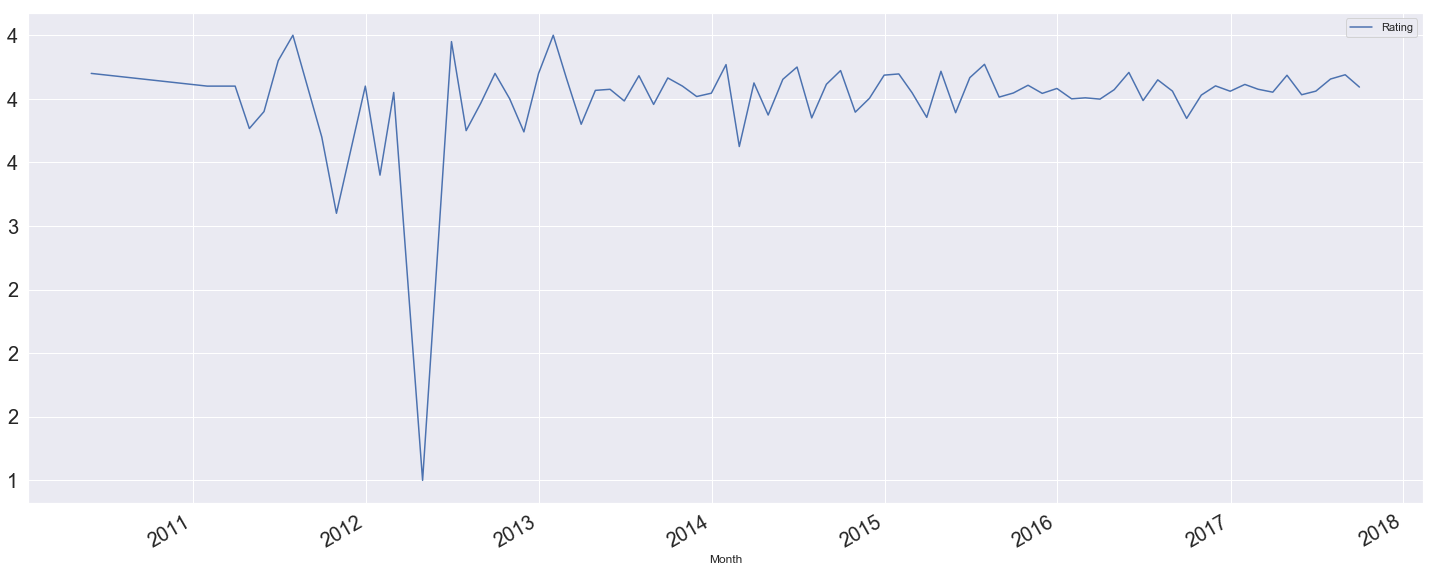

In [85]:

for var in ['Rating']:
    from pylab import rcParams
    rcParams['figure.figsize'] = 20, 10

    k = df[df['Month']<'2017-10-31'].groupby(["Month"]).agg({var:'mean'}) 
    k.columns=[var]
    k=k.sort_values(var,ascending=False)
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    k[k[var]>0].sort_values('Month').plot(kind='line', ax=ax,fontsize=20)
    fmt = '{x:,.0f}'##to get the y axis in comma puntuated values -- for example not 40000000, but 400,000,000.
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 


    plt.show()

##tick = mtick.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(tick) 


#plt.show()

Text(0, 0.5, 'Revenue')

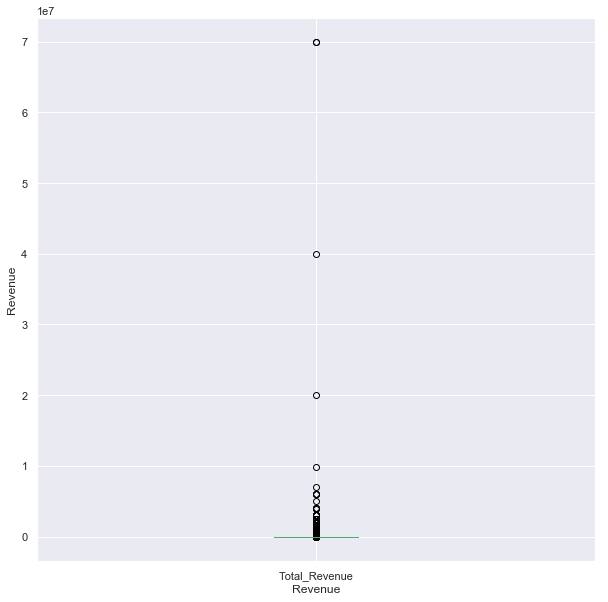

In [86]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 10)


df.boxplot(column = ['Total_Revenue'])
plt.xlabel('Revenue')
plt.ylabel('Revenue')


Text(0, 0.5, 'Installs_num')

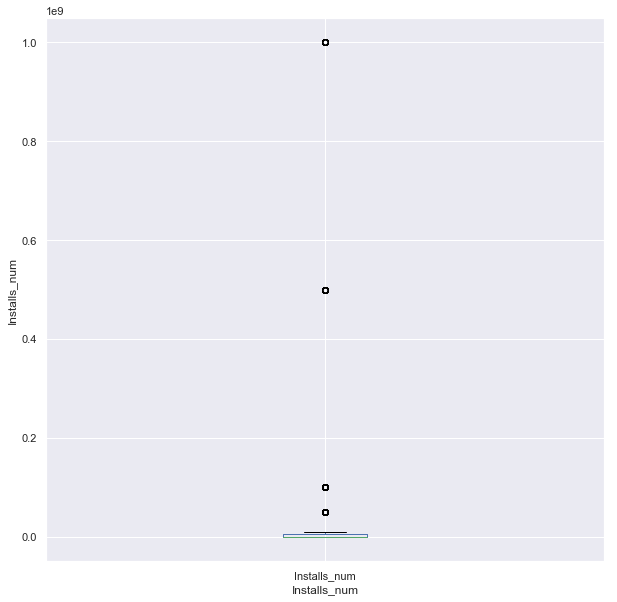

In [87]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 10)


df.boxplot(column = ['Installs_num'])
plt.xlabel('Installs_num')
plt.ylabel('Installs_num')

Text(0, 0.5, 'Rating')

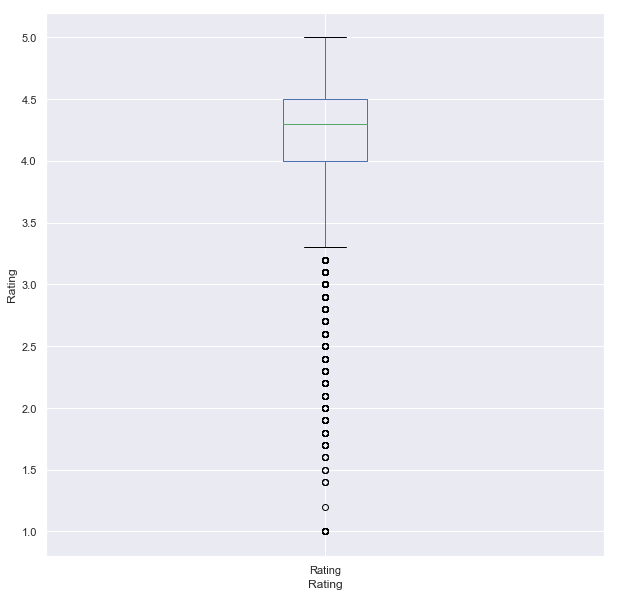

In [88]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 10)


df.boxplot(column = ['Rating'])
plt.xlabel('Rating')
plt.ylabel('Rating')

## The Rating Boxplot shows a median rating of around 4 with an outlier of 19 which is most likely due to an error in data. 

# Conclusion:

## The analysis of the data revealed app users for paid and free apps rated their apps the similarly. This may be a good detail for developers to have to understand how they want to tackle their next app launch (Free vs Paid).   
## We also found that there is not a strong correlation between app ratings and number of installs. This means that the higher the app rating may not necessarily mean the more amount of installs. 


## Hypothesis: Paid apps are rated higher than free apps.
## Result: The pvalue is less than 0.05 therefore, the two populations are different so we reject the null hypothesis. This means that Apps have a different population between paid and free apps.

## Hypothesis: Family type apps have higher ratings than gaming type apps.
## Result: The pvalue is more than 0.05 therefore, the two populations are similar so we fail to reject null hypothesis.

